In [175]:
import pandas as pd
import matplotlib as plt
import pandas as pd
import requests
from datetime import datetime, timedelta


## hacer una dataframe con la serie de tiempo de las 10 monedas, y base de dats categorias, qeudarse solo con capitalziacion de mercado (quitar 39),  y columnas nombre, contenido, cap mercado, volumen

In [176]:
# URL de la API de CoinGecko para obtener datos de criptomonedas
api_url = 'https://api.coingecko.com/api/v3/coins/markets'

# Parámetros de la solicitud
params = {
    'vs_currency': 'usd',  # Moneda base (USD)
    'order': 'market_cap_desc',  # Ordenar por capitalización de mercado descendente
    'per_page': 10,  # Número de resultados por página
    'page': 1  # Página de resultados
}

# Realizar la solicitud HTTP a la API
response = requests.get(api_url, params=params)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Convertir la respuesta JSON en una lista de diccionarios
    data = response.json()

    # Crear un DataFrame de Pandas a partir de la lista de diccionarios
    df = pd.DataFrame(data)
    # Ahora puedes usar df para realizar análisis en los datos
    print(df.head())

    # Crear una lista con los IDs de las 10 primeras criptomonedas
    top_coins_id = [coin['id'] for coin in data]

    # Imprimir la lista de IDs
    print(top_coins_id)
else:
    print('Error al obtener los datos de la API')


            id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3  binancecoin    bnb       BNB   
4       ripple    xrp       XRP   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...   26161.000000   
1  https://assets.coingecko.com/coins/images/279/...    1676.160000   
2  https://assets.coingecko.com/coins/images/325/...       1.001000   
3  https://assets.coingecko.com/coins/images/825/...     216.810000   
4  https://assets.coingecko.com/coins/images/44/l...       0.546604   

     market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  509221474249                1             549437189183    9087795670   
1  201568392966                2             201568392966    8554975356   
2   82825373917                3              82825373917   12449378159   
3   33358712715                4              43363508986     

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10 non-null     object 
 1   symbol                            10 non-null     object 
 2   name                              10 non-null     object 
 3   image                             10 non-null     object 
 4   current_price                     10 non-null     float64
 5   market_cap                        10 non-null     int64  
 6   market_cap_rank                   10 non-null     int64  
 7   fully_diluted_valuation           10 non-null     int64  
 8   total_volume                      10 non-null     int64  
 9   high_24h                          10 non-null     float64
 10  low_24h                           10 non-null     float64
 11  price_change_24h                  10 non-null     float64
 12  price_chang

In [178]:
df.head(10) # ordenado por capitalización de mercado

id symbol               name  \
0       bitcoin    btc            Bitcoin   
1      ethereum    eth           Ethereum   
2        tether   usdt             Tether   
3   binancecoin    bnb                BNB   
4        ripple    xrp                XRP   
5      usd-coin   usdc           USD Coin   
6  staked-ether  steth  Lido Staked Ether   
7       cardano    ada            Cardano   
8      dogecoin   doge           Dogecoin   
9        solana    sol             Solana   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...   26161.000000   
1  https://assets.coingecko.com/coins/images/279/...    1676.160000   
2  https://assets.coingecko.com/coins/images/325/...       1.001000   
3  https://assets.coingecko.com/coins/images/825/...     216.810000   
4  https://assets.coingecko.com/coins/images/44/l...       0.546604   
5  https://assets.coingecko.com/coins/images/6319...       1.000000   
6  https://assets.coingecko.com/coins/images/1344...    1675.580000   
7  https://assets.coingecko.com/coins/images/975/...       0.268626   
8  https://assets.coingecko.com/coins/images/5/la...       0.064097   
9  https://assets.coingecko.com/coins/images/4128...      21.920000   

     market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  509221474249                1             549437189183    9087795670   
1  201568392966                2             201568392966    8554975356   
2   82825373917                3              82825373917   12449378159   
3   33358712715                4              43363508986     332774213   
4   28915896546                5              54721563403    1394503678   
5   25993897773                6              25993897773    4362312717   
6   13753223594                7              13754226502       5512123   
7    9408292801                8              12080836764     144249601   
8    9014973463                9               9014980513     250556579   
9    8939431274               10              12181060097     225383276   

       high_24h  ...  total_supply    max_supply           ath  \
0  26248.000000  ...  2.100000e+07  2.100000e+07  69045.000000   
1   1692.840000  ...  1.202116e+08           NaN   4878.260000   
2      1.002000  ...  8.284648e+10           NaN      1.320000   
3    219.210000  ...  1.538562e+08  2.000000e+08    686.310000   
4      0.551415  ...  9.998850e+10  1.000000e+11      3.400000   
5      1.002000  ...  2.598161e+10           NaN      1.170000   
6   1692.300000  ...  8.206009e+06  8.206009e+06   4829.570000   
7      0.270138  ...  4.500000e+10  4.500000e+10      3.090000   
8      0.064580  ...  1.406677e+11           NaN      0.731578   
9     22.150000  ...  5.554658e+08           NaN    259.960000   

   ath_change_percentage                  ath_date         atl  \
0              -62.07206  2021-11-10T14:24:11.849Z   67.810000   
1              -65.62424  2021-11-10T14:24:19.604Z    0.432979   
2              -24.34139  2018-07-24T00:00:00.000Z    0.572521   
3              -68.40306  2021-05-10T07:24:17.097Z    0.039818   
4              -83.90280  2018-01-07T00:00:00.000Z    0.002686   
5              -14.69239  2019-05-08T00:40:28.300Z    0.877647   
6              -65.30853  2021-11-10T14:40:47.256Z  482.900000   
7              -91.29819  2021-09-02T06:00:10.474Z    0.019253   
8              -91.24190  2021-05-08T05:08:23.458Z    0.000087   
9              -91.56448  2021-11-06T21:54:35.825Z    0.500801   

   atl_change_percentage                  atl_date  \
0            38519.14469  2013-07-06T00:00:00.000Z   
1           387202.81301  2015-10-20T00:00:00.000Z   
2               74.84696  2015-03-02T00:00:00.000Z   
3           544511.78077  2017-10-19T00:00:00.000Z   
4            20265.34539  2014-05-22T00:00:00.000Z   
5               13.98751  2023-03-11T08:02:13.981Z   
6              246.95840  2020-12-22T04:08:21.854Z   
7             1295.2150

In [179]:
df.describe()


current_price    market_cap  market_cap_rank  fully_diluted_valuation  \
count      10.000000  1.000000e+01         10.00000             1.000000e+01   
mean     2975.435033  9.229997e+10          5.50000             1.004941e+11   
std      8175.371923  1.579968e+11          3.02765             1.681586e+11   
min         0.064097  8.939431e+09          1.00000             9.014981e+09   
25%         0.659953  1.049453e+10          3.25000             1.257435e+10   
50%        11.460500  2.745490e+10          5.50000             3.467870e+10   
75%      1310.887500  7.045871e+10          7.75000             7.579942e+10   
max     26161.000000  5.092215e+11         10.00000             5.494372e+11   

       total_volume      high_24h       low_24h  price_change_24h  \
count  1.000000e+01     10.000000     10.000000         10.000000   
mean   3.680744e+09   2987.739013   2947.773894         27.677308   
std    4.672656e+09   8202.098596   8099.439864         76.024801   
min    5.512123e+06      0.064580      0.063299          0.000622   
25%    2.316766e+08      0.664061      0.628000          0.001906   
50%    8.636389e+08     11.576000     11.309232          0.123720   
75%    7.506810e+09   1324.027500   1298.635000         12.190000   
max    1.244938e+10  26248.000000  25918.000000        243.280000   

       price_change_percentage_24h  market_cap_change_24h  \
count                    10.000000           1.000000e+01   
mean                      1.533687           9.581578e+08   
std                       2.387286           1.541549e+09   
min                       0.062190           1.918173e+07   
25%                       0.919990           8.530776e+07   
50%                       0.942200           1.253836e+08   
75%                       0.961205           1.531815e+09   
max                       8.245950           4.655048e+09   

       market_cap_change_percentage_24h  circulating_supply  total_supply  \
count                         10.000000        1.000000e+01  1.000000e+01   
mean                           1.534556        3.380920e+10  3.953430e+10   
std                            2.431585        4.704131e+10  5.133704e+10   
min                            0.023280        8.205410e+06  8.206009e+06   
25%                            0.884532        1.286227e+08  1.286227e+08   
50%                            0.942650        1.319463e+10  1.326854e+10   
75%                            1.073017        4.839266e+10  7.338486e+10   
max                            8.362200        1.406676e+11  1.406677e+11   

         max_supply           ath  ath_change_percentage         atl  \
count  5.000000e+00     10.000000              10.000000   10.000000   
mean   2.904584e+10   7970.881158             -65.844904   55.315579   
std    4.417787e+10  21549.744399              27.163492  151.728563   
min    8.206009e+06      0.731578             -91.564480    0.000087   
25%    2.100000e+07      1.762500             -89.407125    0.024394   
50%    2.000000e+08    131.680000             -67.013650    0.466890   
75%    4.500000e+10   3793.755000             -62.881177    0.801365   
max    1.000000e+11  69045.000000             -14.692390  482.900000   

       atl_change_percentage  
count              10.000000  
mean           107003.682674  
std            194152.504689  
min                13.987510  
25%               509.022555  
50%             12272.054985  
75%             64850.763980  
max            544511.780770

In [180]:
df.isnull().sum()

id                                  0
symbol                              0
name                                0
image                               0
current_price                       0
market_cap                          0
market_cap_rank                     0
fully_diluted_valuation             0
total_volume                        0
high_24h                            0
low_24h                             0
price_change_24h                    0
price_change_percentage_24h         0
market_cap_change_24h               0
market_cap_change_percentage_24h    0
circulating_supply                  0
total_supply                        0
max_supply                          5
ath                                 0
ath_change_percentage               0
ath_date                            0
atl                                 0
atl_change_percentage               0
atl_date                            0
roi                                 9
last_updated                        0
dtype: int64

In [181]:
df.duplicated(subset=["current_price"]).sum()

0

In [182]:
df["fully_diluted_valuation"].head(10)

0    549437189183
1    201568392966
2     82825373917
3     43363508986
4     54721563403
5     25993897773
6     13754226502
7     12080836764
8      9014980513
9     12181060097
Name: fully_diluted_valuation, dtype: int64

In [183]:



columns_to_remove = [3, 6, 9,10,11,12,13,14,  19, 20, 22,23, 25]  # Índices de las columnas a eliminar

# Eliminar las columnas usando el método drop con axis=1
df = df.drop(df.columns[columns_to_remove], axis=1)

# Ahora df solo contendrá las columnas restantes


In [184]:
df.info()  #df mercado global x capitalizacion de mercado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10 non-null     object 
 1   symbol                   10 non-null     object 
 2   name                     10 non-null     object 
 3   current_price            10 non-null     float64
 4   market_cap               10 non-null     int64  
 5   fully_diluted_valuation  10 non-null     int64  
 6   total_volume             10 non-null     int64  
 7   circulating_supply       10 non-null     float64
 8   total_supply             10 non-null     float64
 9   max_supply               5 non-null      float64
 10  ath                      10 non-null     float64
 11  atl                      10 non-null     float64
 12  roi                      1 non-null      object 
dtypes: float64(6), int64(3), object(4)
memory usage: 1.1+ KB


In [185]:
# Exportar el DataFrame a un archivo CSV
nombre_archivo = "df_markets_mark_cap.csv"
df.to_csv(nombre_archivo, index=False)

In [186]:
df

id symbol               name  current_price    market_cap  \
0       bitcoin    btc            Bitcoin   26161.000000  509221474249   
1      ethereum    eth           Ethereum    1676.160000  201568392966   
2        tether   usdt             Tether       1.001000   82825373917   
3   binancecoin    bnb                BNB     216.810000   33358712715   
4        ripple    xrp                XRP       0.546604   28915896546   
5      usd-coin   usdc           USD Coin       1.000000   25993897773   
6  staked-ether  steth  Lido Staked Ether    1675.580000   13753223594   
7       cardano    ada            Cardano       0.268626    9408292801   
8      dogecoin   doge           Dogecoin       0.064097    9014973463   
9        solana    sol             Solana      21.920000    8939431274   

   fully_diluted_valuation  total_volume  circulating_supply  total_supply  \
0             549437189183    9087795670        1.946292e+07  2.100000e+07   
1             201568392966    8554975356        1.202116e+08  1.202116e+08   
2              82825373917   12449378159        8.284648e+10  8.284648e+10   
3              43363508986     332774213        1.538562e+08  1.538562e+08   
4              54721563403    1394503678        5.284187e+10  9.998850e+10   
5              25993897773    4362312717        2.598161e+10  2.598161e+10   
6              13754226502       5512123        8.205410e+06  8.206009e+06   
7              12080836764     144249601        3.504502e+10  4.500000e+10   
8               9014980513     250556579        1.406676e+11  1.406677e+11   
9              12181060097     225383276        4.076450e+08  5.554658e+08   

     max_supply           ath         atl  \
0  2.100000e+07  69045.000000   67.810000   
1           NaN   4878.260000    0.432979   
2           NaN      1.320000    0.572521   
3  2.000000e+08    686.310000    0.039818   
4  1.000000e+11      3.400000    0.002686   
5           NaN      1.170000    0.877647   
6  8.206009e+06   4829.570000  482.900000   
7  4.500000e+10      3.090000    0.019253   
8           NaN      0.731578    0.000087   
9           NaN    259.960000    0.500801   

                                                 roi  
0                                               None  
1  {'times': 84.64095909716127, 'currency': 'btc'...  
2                                               None  
3                                               None  
4                                               None  
5                                               None  
6                                               None  
7                                               None  
8                                               None  
9                                               None

In [187]:

#df global x precio más alto
df_precios = df.sort_values(by='current_price', ascending=False)




In [188]:
df_precios.head(10)

id symbol               name  current_price    market_cap  \
0       bitcoin    btc            Bitcoin   26161.000000  509221474249   
1      ethereum    eth           Ethereum    1676.160000  201568392966   
6  staked-ether  steth  Lido Staked Ether    1675.580000   13753223594   
3   binancecoin    bnb                BNB     216.810000   33358712715   
9        solana    sol             Solana      21.920000    8939431274   
2        tether   usdt             Tether       1.001000   82825373917   
5      usd-coin   usdc           USD Coin       1.000000   25993897773   
4        ripple    xrp                XRP       0.546604   28915896546   
7       cardano    ada            Cardano       0.268626    9408292801   
8      dogecoin   doge           Dogecoin       0.064097    9014973463   

   fully_diluted_valuation  total_volume  circulating_supply  total_supply  \
0             549437189183    9087795670        1.946292e+07  2.100000e+07   
1             201568392966    8554975356        1.202116e+08  1.202116e+08   
6              13754226502       5512123        8.205410e+06  8.206009e+06   
3              43363508986     332774213        1.538562e+08  1.538562e+08   
9              12181060097     225383276        4.076450e+08  5.554658e+08   
2              82825373917   12449378159        8.284648e+10  8.284648e+10   
5              25993897773    4362312717        2.598161e+10  2.598161e+10   
4              54721563403    1394503678        5.284187e+10  9.998850e+10   
7              12080836764     144249601        3.504502e+10  4.500000e+10   
8               9014980513     250556579        1.406676e+11  1.406677e+11   

     max_supply           ath         atl  \
0  2.100000e+07  69045.000000   67.810000   
1           NaN   4878.260000    0.432979   
6  8.206009e+06   4829.570000  482.900000   
3  2.000000e+08    686.310000    0.039818   
9           NaN    259.960000    0.500801   
2           NaN      1.320000    0.572521   
5           NaN      1.170000    0.877647   
4  1.000000e+11      3.400000    0.002686   
7  4.500000e+10      3.090000    0.019253   
8           NaN      0.731578    0.000087   

                                                 roi  
0                                               None  
1  {'times': 84.64095909716127, 'currency': 'btc'...  
6                                               None  
3                                               None  
9                                               None  
2                                               None  
5                                               None  
4                                               None  
7                                               None  
8                                               None

In [202]:

#Exploramos datos historicos en la API, por moneda
# ID de la criptomoneda en CoinGecko (por ejemplo, 'bitcoin')
crypto_id = 'bitcoin'

# Fecha de inicio (1 de enero de 2023)
start_date = datetime(2023, 1, 1)  # Cambio aquí: Utilizar datetime en lugar de date

# Fecha de fin (hasta el último día de hoy)
end_date = datetime.now()

# Convertir las fechas a formato UNIX timestamp (en segundos)
start_timestamp = int(start_date.timestamp())
end_timestamp = int(end_date.timestamp())

# URL de la API de CoinGecko para obtener datos históricos en el rango de tiempo
api_url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart/range?vs_currency=usd&from={start_timestamp}&to={end_timestamp}'

# Realizar la solicitud HTTP a la API
response = requests.get(api_url)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Convertir la respuesta JSON en un diccionario
    data = response.json()

    # Extraer los datos de precios y fechas del diccionario
    prices = data['prices']
    timestamps = [timestamp for timestamp, _ in prices]

    # Crear un DataFrame de Pandas a partir de los datos
    df_historical = pd.DataFrame(prices, columns=['timestamp', 'price'])

    # Convertir los timestamps a fechas legibles
    df_historical['timestamp'] = pd.to_datetime(timestamps, unit='ms')

    # Ahora puedes usar df_historical para analizar los datos históricos de precios
    print(df_historical.head())
else:
    print('Error al obtener los datos históricos desde la API')


Error al obtener los datos históricos desde la API


In [210]:

#Creamos una función para traer datos históricos de las 10 monedas principales
# Lista de los ID de las 10 principales criptomonedas
#Este codigo funciona, pero a veces cuando se vuelve a ejecutar falla para algunas monedas, y hay que volver a ejecutarlo hasta que de ok
top_coins_ids = [
    'bitcoin', 'ethereum', 'cardano', 'binancecoin', 'solana',
    'ripple', 'polkadot', 'dogecoin', 'avalanche-2', 'shiba-inu'
]

# Función para obtener datos históricos de una moneda
def get_historical_data(crypto_id):
    start_date = datetime(2023, 1, 1)
    end_date = datetime.now()

    start_timestamp = int(start_date.timestamp())
    end_timestamp = int(end_date.timestamp())

    api_url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart/range?vs_currency=usd&from={start_timestamp}&to={end_timestamp}'

    response = requests.get(api_url)

    if response.status_code == 200:
        data = response.json()

        prices = data['prices']
        timestamps = [timestamp for timestamp, _ in prices]
        market_caps = data['market_caps']
        total_volumes = data['total_volumes']

        df_historical = pd.DataFrame({
            'timestamp': pd.to_datetime(timestamps, unit='ms'),
            'price': [price for _, price in prices],
            'market_cap': [cap for _, cap in market_caps],
            'total_volume': [volume for _, volume in total_volumes],
            
        })

        return df_historical
    else:
        print(f'Error al obtener los datos históricos para {crypto_id}')
        return None

# Crear un diccionario para almacenar los DataFrames de cada moneda
dataframes_by_coin = {}

# Iterar a través de los IDs de moneda y obtener los datos históricos
for coin_id in top_coins_ids:
    dataframe = get_historical_data(coin_id)
    if dataframe is not None:
        dataframes_by_coin[coin_id] = dataframe


Error al obtener los datos históricos para bitcoin
Error al obtener los datos históricos para ethereum
Error al obtener los datos históricos para cardano
Error al obtener los datos históricos para binancecoin
Error al obtener los datos históricos para solana
Error al obtener los datos históricos para ripple
Error al obtener los datos históricos para polkadot
Error al obtener los datos históricos para dogecoin
Error al obtener los datos históricos para avalanche-2
Error al obtener los datos históricos para shiba-inu


In [191]:
dataframes_by_coin["ethereum"]

timestamp        price    market_cap  total_volume
0   2023-01-02  1200.659217  1.447122e+11  2.179799e+09
1   2023-01-03  1214.378946  1.464431e+11  3.845096e+09
2   2023-01-04  1214.760969  1.464224e+11  3.385567e+09
3   2023-01-05  1256.436604  1.513229e+11  6.727208e+09
4   2023-01-06  1250.792252  1.508052e+11  4.052352e+09
..         ...          ...           ...           ...
226 2023-08-16  1826.913128  2.194728e+11  4.416612e+09
227 2023-08-17  1809.460474  2.174445e+11  6.472231e+09
228 2023-08-18  1675.862171  2.014830e+11  2.096277e+10
229 2023-08-19  1660.679110  1.993229e+11  1.185691e+10
230 2023-08-20  1669.233455  2.006764e+11  8.226872e+09

[231 rows x 4 columns]

In [206]:
# Imprimir el encabezado de los DataFrames generados de las top 10
for coin_id, dataframe in dataframes_by_coin.items():
    print(f"DataFrame para {coin_id}:")
    print(dataframe.head())
    print()

In [207]:
#Se busca hacer un merge de los dataframe para tener en un dataframe la series de tiempo de las 10 monedas ya realizar comparaciones
#Unificamos a raves de la columna de fecha y tomamos los pecios como variabla a analizar de cada moneda

In [208]:
dataframes_by_coin["bitcoin"]["price"]

KeyError: 'bitcoin'

In [ ]:
#renombro columnas del dataframe para poder hacer el merge a través de timestamp
dataframes_by_coin["bitcoin"].rename(columns={"price": "bitcoin_price"}, inplace=True)
dataframes_by_coin["ethereum"].rename(columns={"price": "ethereum_price"}, inplace=True)
dataframes_by_coin["cardano"].rename(columns={"price": "cardano_price"}, inplace=True)
dataframes_by_coin["binancecoin"].rename(columns={"price": "binancecoin_price"}, inplace=True)
dataframes_by_coin["solana"].rename(columns={"price": "solana_price"}, inplace=True)
dataframes_by_coin["ripple"].rename(columns={"price": "ripple_price"}, inplace=True)
dataframes_by_coin["polkadot"].rename(columns={"price": "polkadot_price"}, inplace=True)
dataframes_by_coin["dogecoin"].rename(columns={"price": "dogecoin_price"}, inplace=True)
dataframes_by_coin["avalanche-2"].rename(columns={"price": "avalanche-2_price"}, inplace=True)
dataframes_by_coin["shiba-inu"].rename(columns={"price": "shiba-inu_price"}, inplace=True) 


KeyError: 'avalanche-2'

In [ ]:
dataframes_by_coin["bitcoin"].rename(columns={"market_cap": "bitcoin_market_cap"}, inplace=True)
dataframes_by_coin["ethereum"].rename(columns={"market_cap": "ethereum_market_cap"}, inplace=True)
dataframes_by_coin["cardano"].rename(columns={"market_cap": "cardano_market_cap"}, inplace=True)
dataframes_by_coin["binancecoin"].rename(columns={"market_cap": "binancecoin_market_cap"}, inplace=True)
dataframes_by_coin["solana"].rename(columns={"market_cap": "solana_market_cap"}, inplace=True)
dataframes_by_coin["ripple"].rename(columns={"market_cap": "ripple_market_cap"}, inplace=True)
dataframes_by_coin["polkadot"].rename(columns={"market_cap": "polkadot_market_cap"}, inplace=True)
dataframes_by_coin["dogecoin"].rename(columns={"market_cap": "dogecoin_market_cap"}, inplace=True)
dataframes_by_coin["avalanche-2"].rename(columns={"market_cap": "avalanche-2_market_cap"}, inplace=True)
dataframes_by_coin["shiba-inu"].rename(columns={"market_cap": "shiba-inu_market_cap"}, inplace=True) 

In [ ]:
dataframes_by_coin["bitcoin"].rename(columns={"total_volume": "bitcoin_total_volume"}, inplace=True)
dataframes_by_coin["ethereum"].rename(columns={"total_volume": "ethereum_total_volume"}, inplace=True)
dataframes_by_coin["cardano"].rename(columns={"total_volume": "cardano_total_volume"}, inplace=True)
dataframes_by_coin["binancecoin"].rename(columns={"total_volume": "binancecoin_total_volume"}, inplace=True)
dataframes_by_coin["solana"].rename(columns={"total_volume": "solana_total_volume"}, inplace=True)
dataframes_by_coin["ripple"].rename(columns={"total_volume": "ripple_total_volume"}, inplace=True)
dataframes_by_coin["polkadot"].rename(columns={"total_volume": "polkadot_total_volume"}, inplace=True)
dataframes_by_coin["dogecoin"].rename(columns={"total_volume": "dogecoin_total_volume"}, inplace=True)
dataframes_by_coin["avalanche-2"].rename(columns={"total_volume": "avalanche-2_total_volume"}, inplace=True)
dataframes_by_coin["shiba-inu"].rename(columns={"total_volume": "shiba-inu_total_volume"}, inplace=True) 

Tomamos una lista de DataFrames que contienen información de precios de criptomonedas, los combinamos en un único DataFrame basado en la columna de tiempo ('timestamp'), realizamos algunas transformaciones, como renombrar la columna ultima a date y seleccionamos en los datos y finalmente producimos tres DataFrame finales, siendo el mas relvante para analisis el dataframe combinasdo con los precios de criptomonedass seleccionadas. 

In [ ]:
#Hacemos el merge de precios
dataframes_list = [
    dataframes_by_coin["bitcoin"],
    dataframes_by_coin["ethereum"],
    dataframes_by_coin["cardano"],
    dataframes_by_coin["binancecoin"],
    dataframes_by_coin["solana"],
    dataframes_by_coin["ripple"],
    dataframes_by_coin["polkadot"],
    dataframes_by_coin["dogecoin"],
    dataframes_by_coin["avalanche-2"],
    dataframes_by_coin["shiba-inu"]
]

# Usar reduce para unir los DataFrames en la lista basados en el timestamp
from functools import reduce

# Función para unir dos DataFrames en función del timestamp
def merge_df(left, right):
    return pd.merge(left, right, on='timestamp', how='outer')

# Combinar todos los DataFrames en uno solo
combined_df = reduce(merge_df, dataframes_list)

# Ordenar el DataFrame por timestamp
combined_df = combined_df.sort_values(by='timestamp')

# Renombrar la columna "timestamp" a "date"
combined_df.rename(columns={'timestamp': 'date'}, inplace=True)

# Seleccionar las columnas que deseas mantener en el DataFrame combinado
columns_to_keep = ['date', 'bitcoin_price', 'ethereum_price', 'cardano_price', 'binancecoin_price', 'solana_price', 'ripple_price', 'polkadot_price', 'dogecoin_price', 'avalanche-2_price', 'shiba-inu_price']
combined_prices_df = combined_df[columns_to_keep]

columns_to_keep1 = ['date', 'bitcoin_market_cap', 'ethereum_market_cap', 'cardano_market_cap', 'binancecoin_market_cap', 'solana_market_cap', 'ripple_market_cap', 'polkadot_market_cap', 'dogecoin_market_cap', 'avalanche-2_market_cap', 'shiba-inu_market_cap']
combined_market_cap_df = combined_df[columns_to_keep1]

columns_to_keep2 = ['date', 'bitcoin_total_volume', 'ethereum_total_volume', 'cardano_total_volume', 'binancecoin_total_volume', 'solana_total_volume', 'ripple_total_volume', 'polkadot_total_volume', 'dogecoin_total_volume', 'avalanche-2_total_volume', 'shiba-inu_total_volume']
combined_total_volumne = combined_df[columns_to_keep2]

combined_prices_df.head()


date  bitcoin_price  ethereum_price  cardano_price  binancecoin_price  \
0 2023-01-02   16615.969318     1200.659217       0.249938         244.064567   
1 2023-01-03   16674.342536     1214.378946       0.253948         245.429756   
2 2023-01-04   16677.646186     1214.760969       0.253144         246.211471   
3 2023-01-05   16855.174739     1256.436604       0.267948         259.128116   
4 2023-01-06   16832.098988     1250.792252       0.269366         256.474013   

   solana_price  ripple_price  polkadot_price  dogecoin_price  \
0      9.973949      0.339066        4.370398        0.070266   
1     11.266377      0.348570        4.488837        0.071426   
2     13.355392      0.343818        4.527619        0.070544   
3     13.456293      0.348149        4.632590        0.073256   
4     13.438480      0.338418        4.618387        0.071537   

   avalanche-2_price  shiba-inu_price  
0          10.862361         0.000008  
1          11.153299         0.000008  
2          11.385008         0.000008  
3          12.082606         0.000008  
4          11.745685         0.000008

In [ ]:
combined_prices_df.describe()

date  bitcoin_price  ethereum_price  cardano_price  \
count                  230     230.000000      230.000000     230.000000   
mean   2023-04-26 12:00:00   26367.516878     1755.668168       0.344389   
min    2023-01-02 00:00:00   16615.969318     1200.659217       0.249938   
25%    2023-02-28 06:00:00   23540.036541     1649.178930       0.299555   
50%    2023-04-26 12:00:00   27295.753575     1818.685497       0.355804   
75%    2023-06-22 18:00:00   29266.600949     1872.068288       0.382622   
max    2023-08-19 00:00:00   31446.014971     2118.598789       0.454158   
std                    NaN    3597.730837      173.628065       0.046967   

       binancecoin_price  solana_price  ripple_price  polkadot_price  \
count         230.000000    230.000000    230.000000      230.000000   
mean          287.628089     21.244129      0.481357        5.672341   
min           215.972916      9.973949      0.338418        4.369109   
25%           244.331464     20.092834      0.395919        5.153863   
50%           304.787846     21.397446      0.468278        5.489570   
75%           314.141139     23.498059      0.516157        6.233216   
max           347.865589     27.365080      0.821237        7.527218   
std            35.706783      3.144051      0.106136        0.705360   

       dogecoin_price  avalanche-2_price  shiba-inu_price  
count      230.000000         230.000000       230.000000  
mean         0.076381          15.582174         0.000010  
min          0.060479          10.542331         0.000007  
25%          0.070948          13.207262         0.000008  
50%          0.074934          15.367398         0.000010  
75%          0.081829          17.614928         0.000011  
max          0.096450          21.428867         0.000015  
std          0.008305           2.717947         0.000002

In [ ]:
# Exportar el DataFrame a un archivo CSV
nombre_archivo = "df_combined_prices.csv"
df.to_csv(nombre_archivo, index=False)

In [214]:
#importar archivo
archivo_csv = 'df_combined_prices.csv'  # Cambia esto a la ubicación real de tu archivo

# Carga el archivo CSV en un DataFrame
df_combined_prices = pd.read_csv(archivo_csv)

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


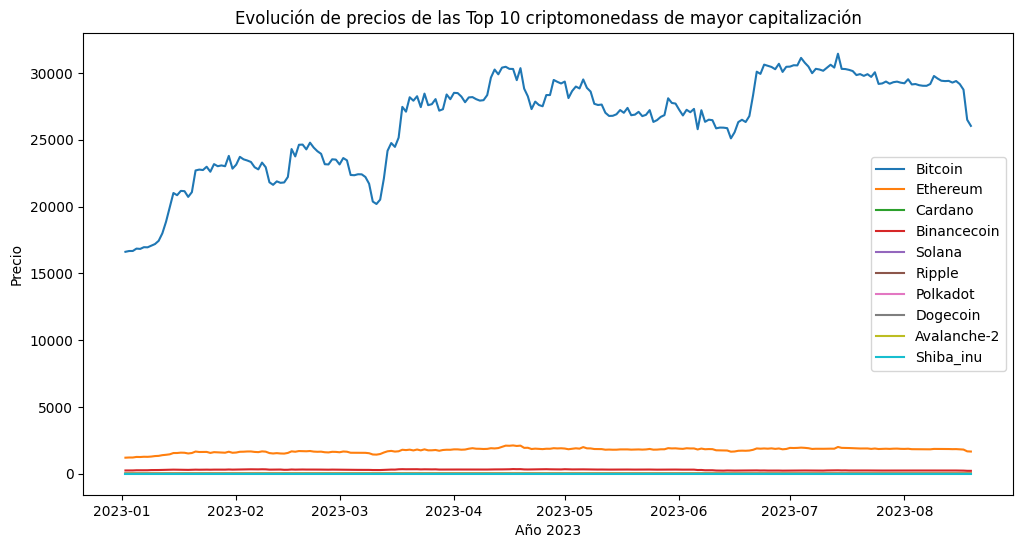

In [216]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_prices_df, x='date', y='bitcoin_price', label='Bitcoin')
sns.lineplot(data=combined_prices_df, x='date', y='ethereum_price', label='Ethereum')
sns.lineplot(data=combined_prices_df, x='date', y='cardano_price', label='Cardano')
sns.lineplot(data=combined_prices_df, x='date', y='binancecoin_price', label='Binancecoin')
sns.lineplot(data=combined_prices_df, x='date', y='solana_price', label='Solana')
sns.lineplot(data=combined_prices_df, x='date', y='ripple_price', label='Ripple')
sns.lineplot(data=combined_prices_df, x='date', y='polkadot_price', label='Polkadot')
sns.lineplot(data=combined_prices_df, x='date', y='dogecoin_price', label='Dogecoin')
sns.lineplot(data=combined_prices_df, x='date', y='avalanche-2_price', label='Avalanche-2')
sns.lineplot(data=combined_prices_df, x='date', y='shiba-inu_price', label='Shiba_inu')

plt.xlabel('Año 2023')
plt.ylabel('Precio')
plt.title('Evolución de precios de las Top 10 criptomonedass de mayor capitalización')
plt.legend()
plt.show()


Observamos que hay escalas muy diferentes entre las criptomonedas, sobre todo el Bitcoin se diferencias mucho del resto. Vamos a ormalizalizar variables. Pero antes calculamos distribucion de frecuencias de cada uno, para saber por donde se ubico el precio con mayor precuencia durante 2023

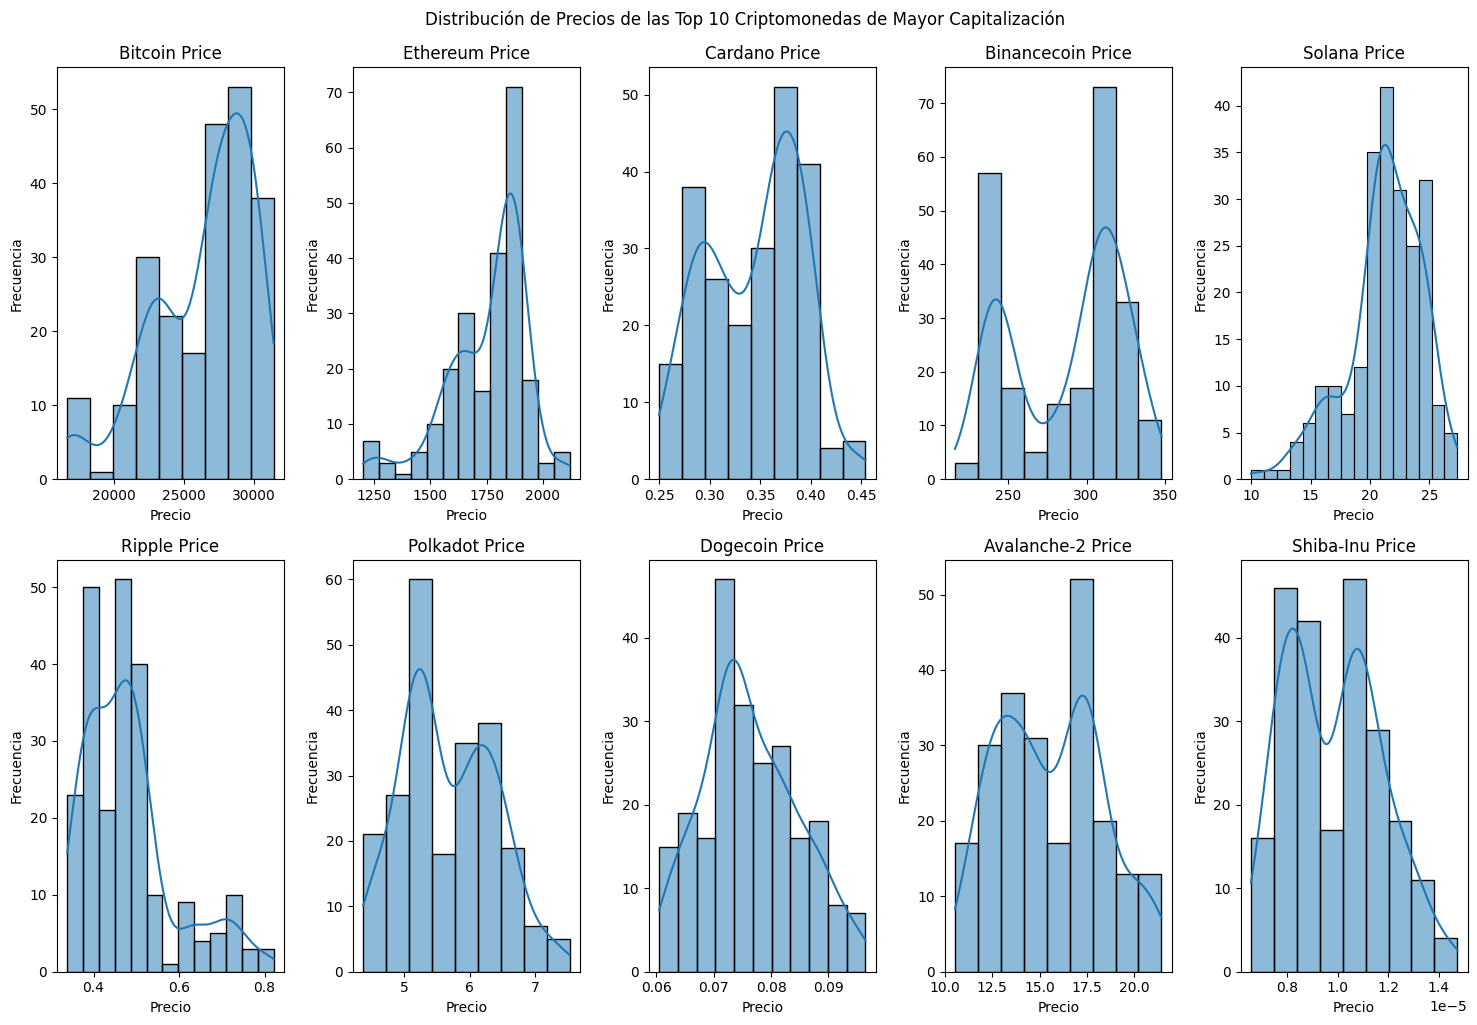

In [217]:



# Supongamos que tienes combined_prices_df y las columnas de precios

# Lista de criptomonedas
crypto_columns = ['bitcoin_price', 'ethereum_price', 'cardano_price', 'binancecoin_price', 'solana_price',
                  'ripple_price', 'polkadot_price', 'dogecoin_price', 'avalanche-2_price', 'shiba-inu_price']

# Tamaño de la figura
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

# Iterar a través de las criptomonedas y crear histogramas
for i, crypto in enumerate(crypto_columns):
    ax = axes[i]
    sns.histplot(data=combined_prices_df, x=crypto, ax=ax, kde=True)
    ax.set_xlabel('Precio')
    ax.set_ylabel('Frecuencia')
    ax.set_title(crypto.replace("_", " ").title())

# Ajustar los subplots y añadir título
plt.tight_layout()
plt.suptitle('Distribución de Precios de las Top 10 Criptomonedas de Mayor Capitalización', y=1.02)
plt.show()


In [218]:
# Guardar la figura en un archivo de imagen (por ejemplo, PNG)
plt.savefig('histogramas_Top_10_criptomonedas.png')

<Figure size 640x480 with 0 Axes>

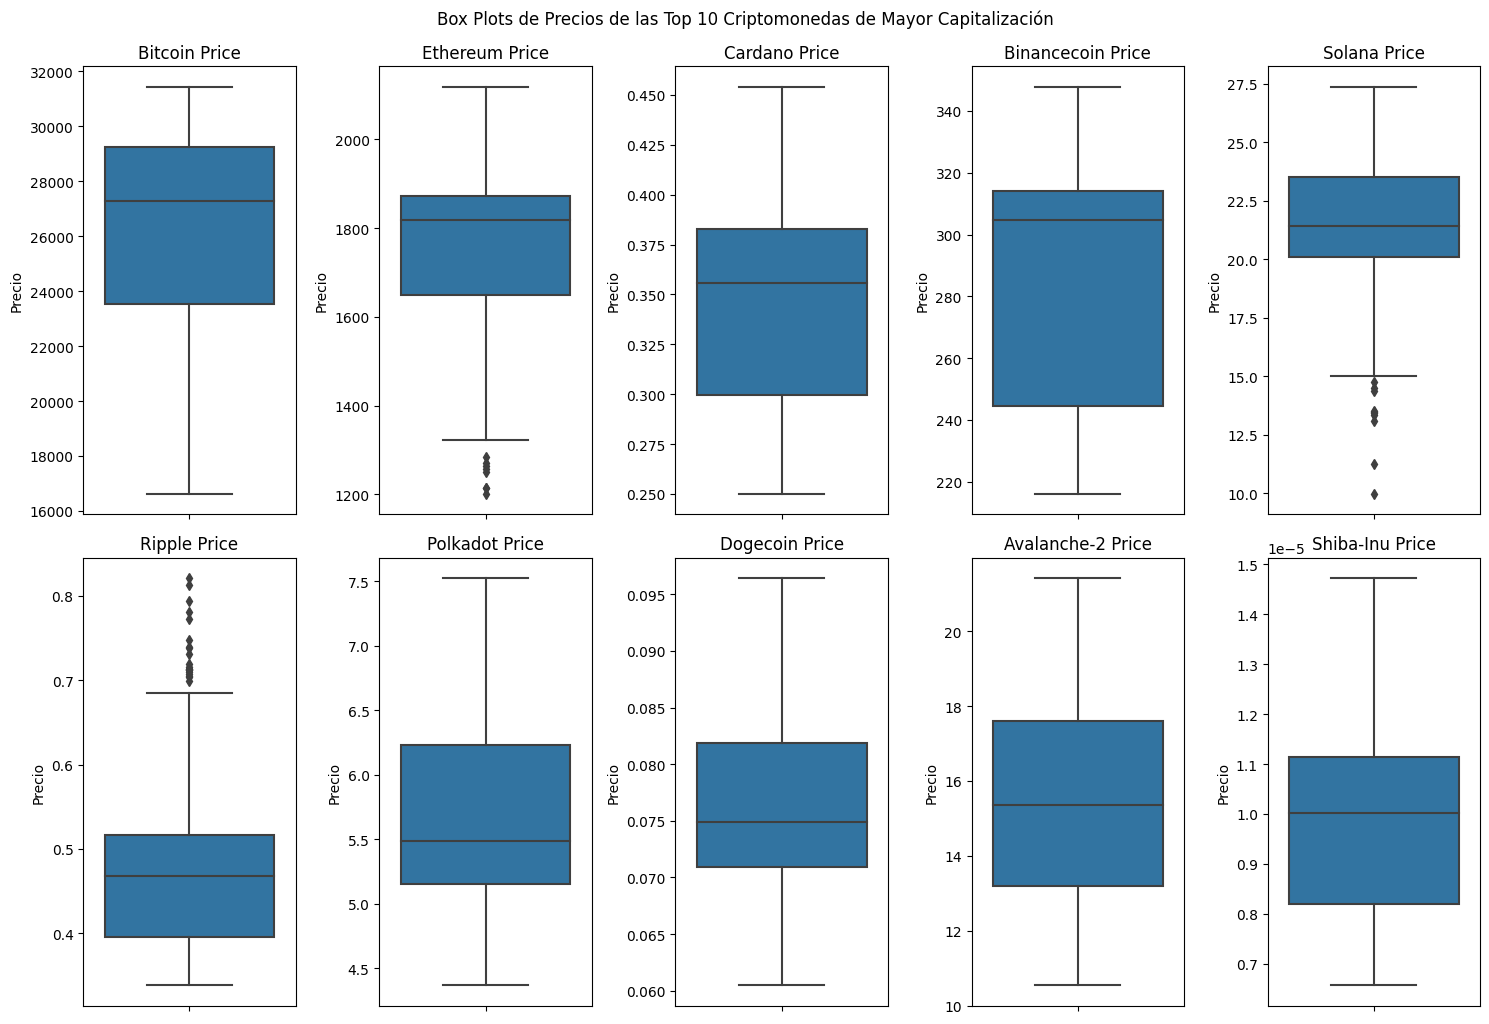

In [219]:
#Buscamos detectar outliers con boxplot.
# Lista de criptomonedas
crypto_columns = ['bitcoin_price', 'ethereum_price', 'cardano_price', 'binancecoin_price', 'solana_price',
                  'ripple_price', 'polkadot_price', 'dogecoin_price', 'avalanche-2_price', 'shiba-inu_price']

# Tamaño de la figura
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

# Iterar a través de las criptomonedas y crear box plots
for i, crypto in enumerate(crypto_columns):
    ax = axes[i]
    sns.boxplot(data=combined_prices_df, y=crypto, ax=ax)
    ax.set_ylabel('Precio')
    ax.set_title(crypto.replace("_", " ").title())

# Ajustar los subplots y añadir título
plt.tight_layout()
plt.suptitle('Box Plots de Precios de las Top 10 Criptomonedas de Mayor Capitalización', y=1.02)

# Mostrar el gráfico en pantalla
plt.show()


In [220]:
#Ver los outliers de Ethereum, Solana, y Ripple
# Por el grafico vemos que el umbral de ethereum es 1300
umbral_ethereum = 1300

# Filtrar los valores atípicos de ethereum
outliers_ethereum = combined_prices_df[combined_prices_df["ethereum_price"] < umbral_ethereum]

# Contar la cantidad de outliers de ethereum
num_outliers_ethereum = len(outliers_ethereum)
print("Número de outliers de Ethereum:", num_outliers_ethereum)



Número de outliers de Ethereum: 8


In [221]:
outliers_ethereum.head(8)

date  bitcoin_price  ethereum_price  cardano_price  binancecoin_price  \
0 2023-01-02   16615.969318     1200.659217       0.249938         244.064567   
1 2023-01-03   16674.342536     1214.378946       0.253948         245.429756   
2 2023-01-04   16677.646186     1214.760969       0.253144         246.211471   
3 2023-01-05   16855.174739     1256.436604       0.267948         259.128116   
4 2023-01-06   16832.098988     1250.792252       0.269366         256.474013   
5 2023-01-07   16960.232062     1270.028610       0.278878         259.800638   
6 2023-01-08   16950.861522     1264.836943       0.277452         261.319265   
7 2023-01-09   17074.615396     1284.575404       0.293615         273.536029   

   solana_price  ripple_price  polkadot_price  dogecoin_price  \
0      9.973949      0.339066        4.370398        0.070266   
1     11.266377      0.348570        4.488837        0.071426   
2     13.355392      0.343818        4.527619        0.070544   
3     13.456293      0.348149        4.632590        0.073256   
4     13.438480      0.338418        4.618387        0.071537   
5     13.524493      0.345120        4.687496        0.072600   
6     13.088904      0.344753        4.667868        0.072326   
7     14.366071      0.345226        4.781660        0.073354   

   avalanche-2_price  shiba-inu_price  
0          10.862361         0.000008  
1          11.153299         0.000008  
2          11.385008         0.000008  
3          12.082606         0.000008  
4          11.745685         0.000008  
5          11.784937         0.000008  
6          11.747206         0.000008  
7          12.026260         0.000009

In [222]:
#Ver los outliers de Solana

# Por el grafico vemos que el umbral de ethereum es 1300
umbral_solana = 15

# Filtrar los valores atípicos de ethereum
outliers_solana = combined_prices_df[combined_prices_df["solana_price"] < umbral_solana]

# Contar la cantidad de outliers de ethereum
num_outliers_solana = len(outliers_solana)
print("Número de outliers de Solana", num_outliers_solana)


Número de outliers de Solana 11


In [223]:
outliers_solana.head(7)

date  bitcoin_price  ethereum_price  cardano_price  binancecoin_price  \
0 2023-01-02   16615.969318     1200.659217       0.249938         244.064567   
1 2023-01-03   16674.342536     1214.378946       0.253948         245.429756   
2 2023-01-04   16677.646186     1214.760969       0.253144         246.211471   
3 2023-01-05   16855.174739     1256.436604       0.267948         259.128116   
4 2023-01-06   16832.098988     1250.792252       0.269366         256.474013   
5 2023-01-07   16960.232062     1270.028610       0.278878         259.800638   
6 2023-01-08   16950.861522     1264.836943       0.277452         261.319265   

   solana_price  ripple_price  polkadot_price  dogecoin_price  \
0      9.973949      0.339066        4.370398        0.070266   
1     11.266377      0.348570        4.488837        0.071426   
2     13.355392      0.343818        4.527619        0.070544   
3     13.456293      0.348149        4.632590        0.073256   
4     13.438480      0.338418        4.618387        0.071537   
5     13.524493      0.345120        4.687496        0.072600   
6     13.088904      0.344753        4.667868        0.072326   

   avalanche-2_price  shiba-inu_price  
0          10.862361         0.000008  
1          11.153299         0.000008  
2          11.385008         0.000008  
3          12.082606         0.000008  
4          11.745685         0.000008  
5          11.784937         0.000008  
6          11.747206         0.000008

In [224]:
#Ver los outliers de Ripple

# Por el grafico vemos que el umbral de Ripple es 1300
umbral_ripple = 0.69

# Filtrar los valores atípicos de ethereum
outliers_ripple = combined_prices_df[combined_prices_df["ripple_price"] > umbral_ripple]

# Contar la cantidad de outliers de ethereum
num_outliers_ripple = len(outliers_ripple)
print("Número de outliers de Ripple", num_outliers_ripple)


Número de outliers de Ripple 20


In [225]:
outliers_ripple.head(20)


date  bitcoin_price  ethereum_price  cardano_price  \
193 2023-07-14   31446.014971     2003.253616       0.356884   
194 2023-07-15   30311.827808     1935.940241       0.328667   
195 2023-07-16   30297.971400     1931.389384       0.325938   
196 2023-07-17   30237.334785     1923.035990       0.314728   
197 2023-07-18   30147.860079     1912.122836       0.312604   
198 2023-07-19   29848.032273     1897.199113       0.306933   
199 2023-07-20   29919.874838     1889.223806       0.324082   
200 2023-07-21   29787.041530     1891.014505       0.315765   
201 2023-07-22   29914.682728     1891.472403       0.313171   
202 2023-07-23   29710.155936     1858.311196       0.308174   
203 2023-07-24   30057.956719     1887.826981       0.317034   
204 2023-07-25   29184.901913     1850.431151       0.305335   
205 2023-07-26   29222.974630     1857.596593       0.303891   
206 2023-07-27   29363.672908     1871.533106       0.306585   
207 2023-07-28   29200.244001     1858.777021       0.307431   
208 2023-07-29   29314.097387     1874.693995       0.309920   
209 2023-07-30   29356.747746     1880.918077       0.312612   
210 2023-07-31   29277.755810     1861.869910       0.315337   
211 2023-08-01   29233.136366     1857.276196       0.307346   
212 2023-08-02   29537.109747     1869.745109       0.309375   

     binancecoin_price  solana_price  ripple_price  polkadot_price  \
193         255.788291     25.990368      0.812509        5.541879   
194         247.695854     26.708371      0.719679        5.447710   
195         251.092986     27.351376      0.713256        5.430796   
196         242.749491     27.365080      0.747667        5.309371   
197         244.197168     26.861798      0.739496        5.302138   
198         240.270930     25.526176      0.781263        5.176626   
199         241.332773     26.353312      0.821237        5.198504   
200         242.624777     25.335069      0.793284        5.348583   
201         243.768842     25.589510      0.772681        5.485974   
202         240.537852     24.456785      0.731402        5.295907   
203         242.381424     24.773704      0.737991        5.397330   
204         238.965494     23.422634      0.703525        5.219262   
205         237.730347     23.267717      0.710253        5.175287   
206         239.020092     25.151988      0.715877        5.238608   
207         240.417367     25.093488      0.713436        5.232445   
208         241.857825     24.825804      0.712297        5.216726   
209         242.556325     25.165048      0.712607        5.252698   
210         242.540332     24.266784      0.704911        5.187981   
211         241.193557     23.756659      0.699030        5.111470   
212         247.428737     23.925547      0.707216        5.189948   

     dogecoin_price  avalanche-2_price  shiba-inu_price  
193        0.070533          14.073462         0.000008  
194        0.068471          14.621206         0.000008  
195        0.072033          14.827656         0.000008  
196        0.069662          14.296980         0.000008  
197        0.069974          14.430245         0.000008  
198        0.068610          13.785500         0.000008  
199        0.070176          14.003989         0.000008  
200        0.070596          13.846493         0.000008  
201        0.073368          13.986579         0.000008  
202        0.070418          13.460285         0.000008  
203        0.071893          13.554560         0.000008  
204        0.074431          13.112017         0.000008  
205        0.081719          13.342366         0.000008  
206        0.077942          13.263779         0.000008  
207        0.077524          13.138965         0.000008  
208        0.077283          13.236289         0.000008  
209        0.080199          13.247479         0.000009  
210        0.078035          13.132356         0.000008  
211        0.077873          12.829237         0.000008  
212        0.077873          12.84

En cuanto a los outliers, vemos que tanto Ethereum como Ripple, tienen 8 y 7, respectivamente, que mrcana los minimos precios de principios de enero, y luego el mercado entró en una recuperación para 2023. En cambio Ripple, esta márcando outliers en sus máximos a fines de julio y agosto, dando cuenta de que en entre fines de julio y agosto un una fuerte alza de precios desde fine de julio y siguió en agosto.Eventualmente podemos quitar los outliers para calcular el precio promedio del año. Dejamos los outliers de Ethereum y Solana porque son pocos, para mantener la integridad temporal y poder efectuar un analisis comparativo con el rresto de las monedas. En el caso de Ripple los dejamos porque justamente el análisis marca que una aceleración alcista reciente de las moneda.

Noticias Ripple, en agosto Ripple obtvo victoria parcial ante la sec y animo a inversorres a seguir invirtiendo. informes recientes señala que :
-Los inversores institucionales han invertido en Ripple (XRP) durante 16 semanas consecutivas según un informe de CoinShares.
-Los activos bajo gestión de productos de inversión en XRP han aumentado un 127% desde principios de año.
-Se han invertido mas de $11,25 millones en XRP desde comienzos de 2023.

https://decrypt.co/es/152465/inversores-institucionales-apuestan-fuertemente-por-xrp-tras-victoria-parcial-de-ripple-vs-la-sec

In [226]:
combined_prices_df.describe()

date  bitcoin_price  ethereum_price  cardano_price  \
count                  230     230.000000      230.000000     230.000000   
mean   2023-04-26 12:00:00   26367.516878     1755.668168       0.344389   
min    2023-01-02 00:00:00   16615.969318     1200.659217       0.249938   
25%    2023-02-28 06:00:00   23540.036541     1649.178930       0.299555   
50%    2023-04-26 12:00:00   27295.753575     1818.685497       0.355804   
75%    2023-06-22 18:00:00   29266.600949     1872.068288       0.382622   
max    2023-08-19 00:00:00   31446.014971     2118.598789       0.454158   
std                    NaN    3597.730837      173.628065       0.046967   

       binancecoin_price  solana_price  ripple_price  polkadot_price  \
count         230.000000    230.000000    230.000000      230.000000   
mean          287.628089     21.244129      0.481357        5.672341   
min           215.972916      9.973949      0.338418        4.369109   
25%           244.331464     20.092834      0.395919        5.153863   
50%           304.787846     21.397446      0.468278        5.489570   
75%           314.141139     23.498059      0.516157        6.233216   
max           347.865589     27.365080      0.821237        7.527218   
std            35.706783      3.144051      0.106136        0.705360   

       dogecoin_price  avalanche-2_price  shiba-inu_price  
count      230.000000         230.000000       230.000000  
mean         0.076381          15.582174         0.000010  
min          0.060479          10.542331         0.000007  
25%          0.070948          13.207262         0.000008  
50%          0.074934          15.367398         0.000010  
75%          0.081829          17.614928         0.000011  
max          0.096450          21.428867         0.000015  
std          0.008305           2.717947         0.000002

In [227]:
from sklearn.preprocessing import MinMaxScaler
# Extraer las fechas antes de la normalización
dates = combined_prices_df['date']

# Normalizar los precios de las criptomonedas (excluyendo la columna de fechas)
scaler = MinMaxScaler()
normalized_prices = scaler.fit_transform(combined_prices_df.drop('date', axis=1))

# Crear un nuevo DataFrame normalizado
nor_combined_prices_df = pd.DataFrame(normalized_prices, columns=combined_prices_df.columns[1:])

# Agregar las fechas de nuevo al DataFrame normalizado
nor_combined_prices_df.insert(0, 'date', dates)

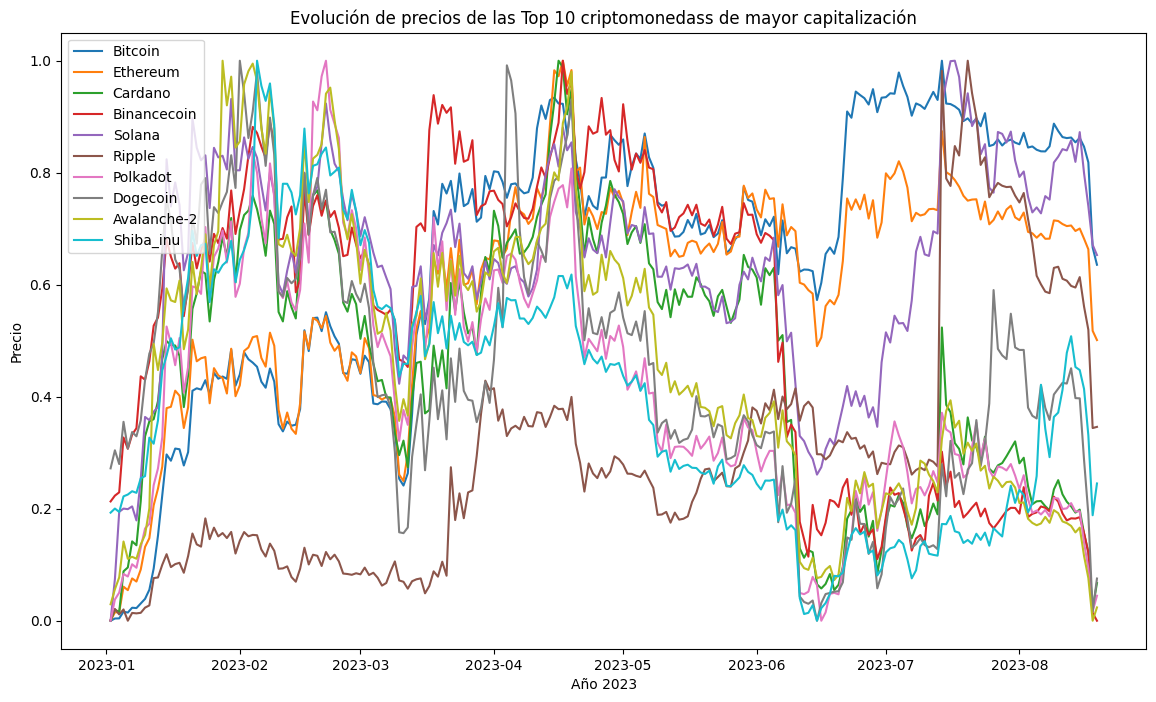

In [228]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=nor_combined_prices_df, x='date', y='bitcoin_price', label='Bitcoin')
sns.lineplot(data=nor_combined_prices_df, x='date', y='ethereum_price', label='Ethereum')
sns.lineplot(data=nor_combined_prices_df, x='date', y='cardano_price', label='Cardano')
sns.lineplot(data=nor_combined_prices_df, x='date', y='binancecoin_price', label='Binancecoin')
sns.lineplot(data=nor_combined_prices_df, x='date', y='solana_price', label='Solana')
sns.lineplot(data=nor_combined_prices_df, x='date', y='ripple_price', label='Ripple')
sns.lineplot(data=nor_combined_prices_df, x='date', y='polkadot_price', label='Polkadot')
sns.lineplot(data=nor_combined_prices_df, x='date', y='dogecoin_price', label='Dogecoin')
sns.lineplot(data=nor_combined_prices_df, x='date', y='avalanche-2_price', label='Avalanche-2')
sns.lineplot(data=nor_combined_prices_df, x='date', y='shiba-inu_price', label='Shiba_inu')

plt.xlabel('Año 2023')
plt.ylabel('Precio')
plt.title('Evolución de precios de las Top 10 criptomonedass de mayor capitalización')
plt.legend()
plt.show()


In [229]:
# Guardar la figura en un archivo de imagen (por ejemplo, PNG)
plt.savefig('Evolución del precio_Top_10_criptomonedas.png')

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

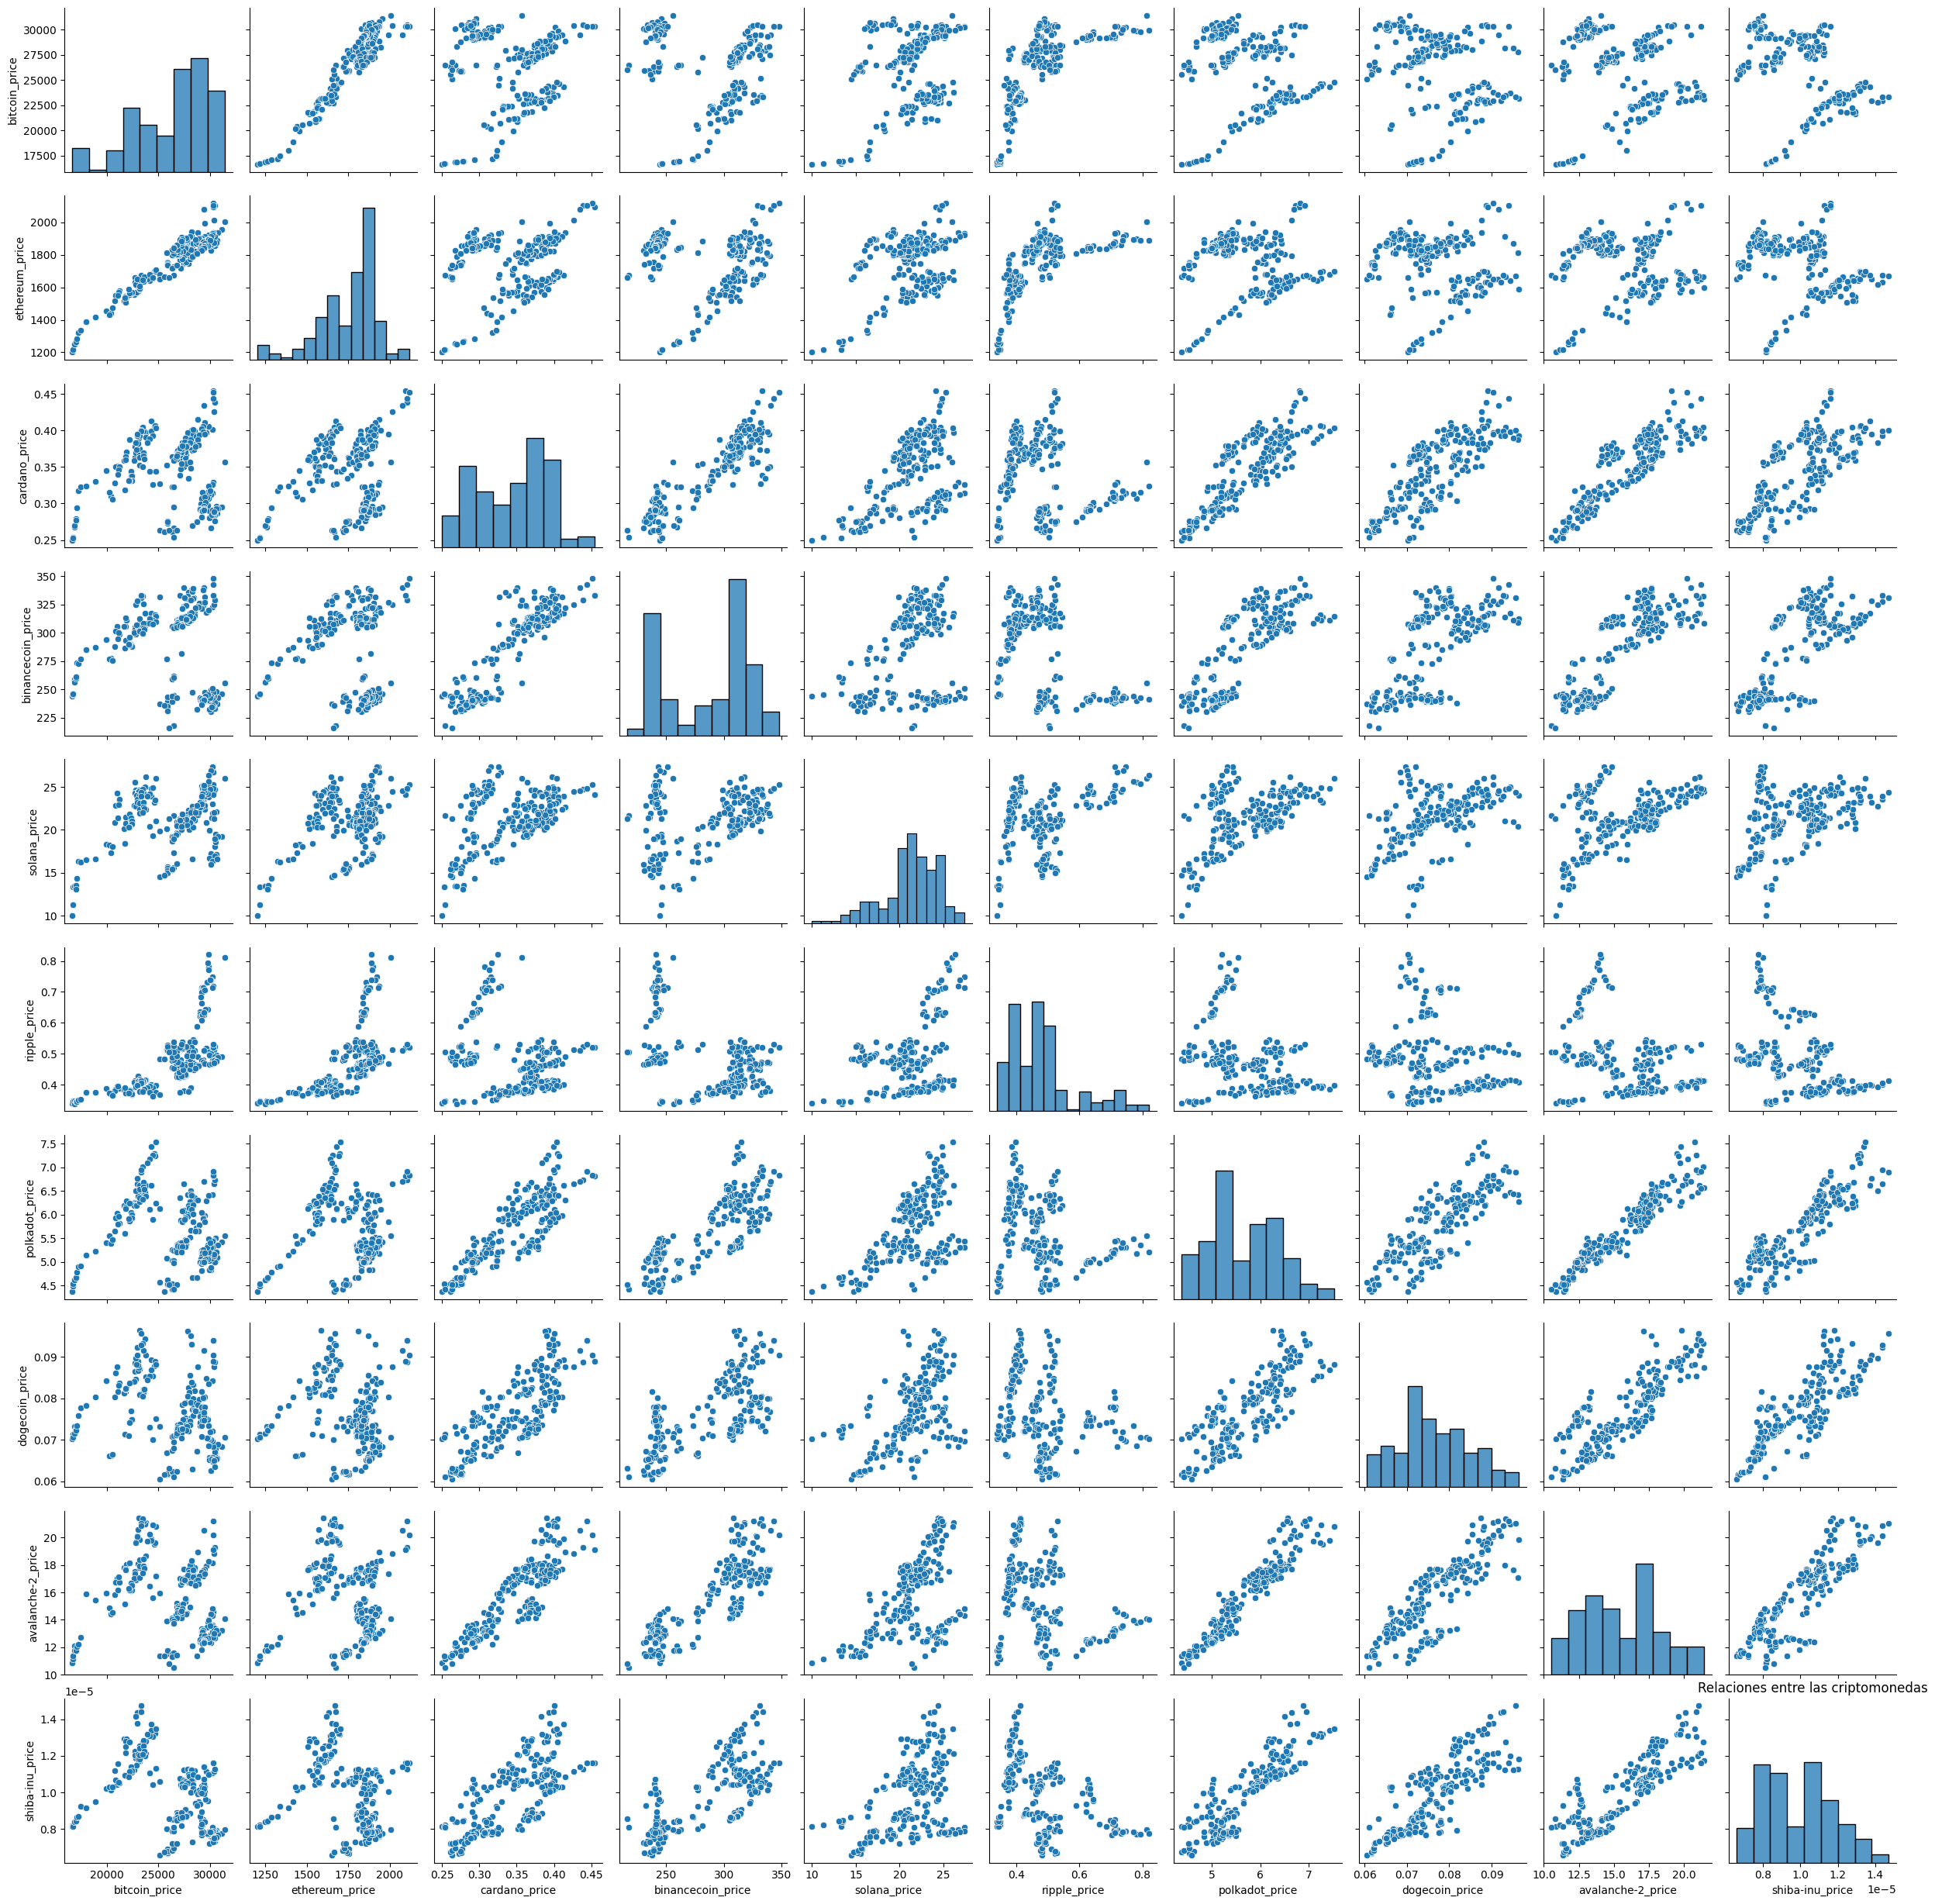

<Figure size 640x480 with 0 Axes>

In [230]:
 
# Convertir la columna de fecha a formato datetime
combined_prices_df.loc[:,'date'] = pd.to_datetime(combined_prices_df['date'])

# Definir la lista de criptomonedas para facilitar el análisis
cryptocurrencies = combined_prices_df.columns[1:]

# Scatter plot para visualizar las relaciones entre criptomonedas
plt.figure(figsize=(10, 8))
sns.pairplot(combined_prices_df, x_vars=cryptocurrencies, y_vars=cryptocurrencies)
plt.title("Relaciones entre las criptomonedas")
plt.show()



plt.savefig('Scatterplot_Top_10_criptomonedas.png')
# Cálculo del ROI
#initial_investment = 10000  # Cambia el valor según tu inversión inicial
#final_portfolio_value = combined_prices_df.iloc[-1, 1:]  # Última fila de precios
#roi = (final_portfolio_value / initial_investment - 1) * 100
#print("ROI por criptomoneda:\n", roi)




Tanto en el scatterplot como en la matriz de correlación se observa que Bitcoin y Ethereum tienen una alta correlacón positiva. Cuando Bitcoin sube, también sube Ethereum, y lo mismo cuando el sentimiento es negativo hacia estas monedas, cuando baja una, también baja la otra. Luego, se ubican cardano, binance, y dogcoin, avalanche-2 y polkadot con uan fuerte correlacion positiva. Estos es, cuando una de ellas se incrementa, tambien se incrementa la otra, aunque la correlación no implique que el ascenso de una moneda sea la causa de la otra. 

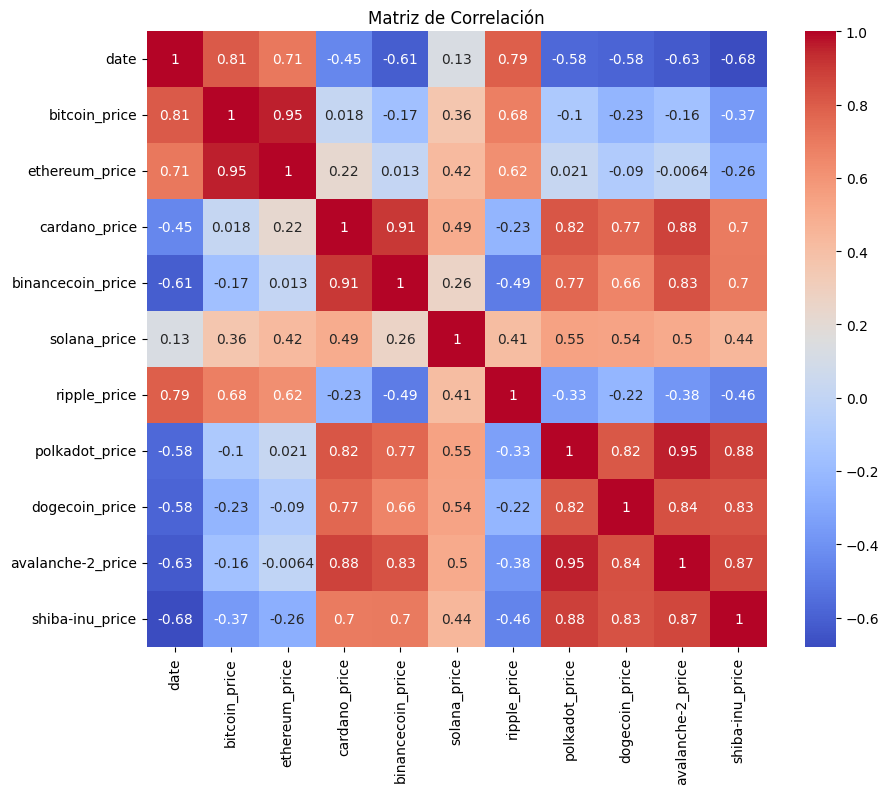

<Figure size 640x480 with 0 Axes>

In [231]:
#Correlaciones entre variables
correlation_matrix = combined_prices_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()
plt.savefig('Correlación_Top_10_criptomonedas.png')




In [232]:



# Obtener la primera y última fecha en el dataframe
first_date = combined_prices_df['date'].iloc[0]
last_date = combined_prices_df['date'].iloc[-1]

# Filtrar el dataframe por la primera y última fecha
first_price_df = combined_prices_df[combined_prices_df['date'] == first_date]
last_price_df = combined_prices_df[combined_prices_df['date'] == last_date]

# Calcular la variación del precio para cada criptomoneda
price_columns = ['bitcoin_price', 'ethereum_price', 'cardano_price', 'binancecoin_price',
'ripple_price', 'polkadot_price', 'dogecoin_price', 'avalanche-2_price']

for crypto in price_columns:
    first_price = first_price_df[crypto].values[0]
    last_price = last_price_df[crypto].values[0]

    
    relative_change = ((last_price - first_price) / first_price) * 100
    print(f"Variación de {crypto} durante lo que va del año 2023:", round(relative_change,2), "%")

    
    




Variación de bitcoin_price durante lo que va del año 2023: 56.73 %
Variación de ethereum_price durante lo que va del año 2023: 38.31 %
Variación de cardano_price durante lo que va del año 2023: 5.5 %
Variación de binancecoin_price durante lo que va del año 2023: -11.51 %
Variación de ripple_price durante lo que va del año 2023: 49.1 %
Variación de polkadot_price durante lo que va del año 2023: 3.2 %
Variación de dogecoin_price durante lo que va del año 2023: -10.07 %
Variación de avalanche-2_price durante lo que va del año 2023: -0.57 %


Entre las criptomoedas de mayor capitalización, durante el 2023 las monedas de mejor desempeño resultaron el Bitcoin (59,49%),  Ripple(48,8%, y Ethereum(39,58%). Vamos a tomar estas tres para acotar el análisis y compararlas con el desempeño de las acciones de Estados Unidos. Elegimos el SPY, que es el ticker y el nombre coloquial del derivado (ETF) que emula el comportamiento del S&P 500, el índice que mira el comportamiento de las 500 mayores empresas de la Economía de EEUU. Es un buen indicador para medir la salud de las economía y las empresas en general, que a su vez están muy afectadas por la inflación e inflación esperada, que se observa en las políticas que toma la Reserva Federal de los Estados Unidos, a través de la política monetaria y en particular de los movicmientos en las tasa de interés de referencia. Esto afecta particularmente el mercado de criptomonedas, ya que si se espera que la economía de EEUU empeore, en el sentido de que suba la inflación y la FED se vea obligada a subir las tasas, habrá más retracción en la inversión y  fuga de capitales hacia activos considerados más seguros, que tendrán un rendimiento mayor, y son considerados y menos volátiles. Por el contrario, si hay mejora en la marcha de las empresas y de la saluda de la economía en general, con una baja inflación, la FED hará la política contraria, expandirá más dinero en la economía para invertir, y las criptomonedas tendrán mayor margen de aceptación enre los inversores.    

In [233]:
import pandas as pd

# Cambia la ruta del archivo si es necesario
spy = "SPY__S&P_500_2023.csv"

# Utiliza pandas para leer el archivo CSV
df_spy = pd.read_csv(spy)

# Ahora puedes trabajar con los datos
df_spy.head()  # Imprime las primeras filas del DataFrame


Date   Price    Open    High     Low   Vol. Change %
0  08/18/2023  681.49  681.76  682.19  679.99  0.56K   -1.08%
1  08/17/2023  688.94  686.00  689.95  685.88  0.53K    0.30%
2  08/16/2023  686.85  687.50  688.54  686.22  0.66K   -0.43%
3  08/15/2023  689.80  691.16  694.37  689.80  1.09K    0.38%
4  08/14/2023  687.22  687.16  688.58  687.16  0.42K    0.38%

In [234]:
# Renombra la columna "date" a "new_date" (cambia "new_date" al nombre deseado)
df_spy.rename(columns={"Date": "date", "Price":"price"}, inplace=True)

In [235]:
# Selecciona las columnas "date" y "price"
df_spy_price = df_spy[["date", "price"]]

In [236]:
type(df_spy_price["date"])

pandas.core.series.Series

In [237]:
type(combined_prices_df["date"])

pandas.core.series.Series

In [242]:
import pandas as pd
from functools import reduce

# Supongamos que df_spy_price tiene la columna "date" en formato de cadena
# y combined_prices_df tiene la columna "date" en formato datetime64[ns]

# Convertir la columna "date" en df_spy_price a datetime64[ns] usando .loc[]
df_spy_price.loc[:, 'date'] = pd.to_datetime(df_spy_price['date'])

combined_prices_df.loc[:,"date"]= pd.to_datetime(combined_prices_df['date'])


In [244]:
# Luego proceder con la combinación
dataframes_list1 = [combined_prices_df, df_spy_price]

def merge_df(left, right):
    return pd.merge(left, right, on='date', how='outer')

combined_prices_spy_df = reduce(merge_df, dataframes_list1)
combined_prices_spy_df = combined_prices_spy_df.sort_values(by='date')

combined_prices_spy_df.head()

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

In [245]:
# Renombrar la columna 'price' a 'spy_price'
combined_prices_spy_df.rename(columns={'price': 'spy_price'}, inplace=True)

# Contar los valores nulos en la columna 'spy_price'
n_nulls = combined_prices_spy_df['spy_price'].isnull().sum()
print(f"Número de valores nulos en spy_price: {n_nulls}")




Número de valores nulos en spy_price: 0


In [ ]:
import datetime

def count_weekdays(year, day_of_week):
    count = 0
    start_date = datetime.date(year, 1, 1)
    end_date = datetime.date(year, 8, 19)
    
    delta = datetime.timedelta(days=1)
    current_date = start_date
    
    while current_date <= end_date:
        if current_date.weekday() == day_of_week:
            count += 1
        current_date += delta
    
    return count

year = 2023  # Cambia esto al año que desees
saturdays = count_weekdays(year, 5)  # 5 representa el sábado
sundays = count_weekdays(year, 6)  # 6 representa el domingo

print(f"En el año {year} hay {saturdays} sábados y {sundays} domingos.")


En el año 2023 hay 33 sábados y 33 domingos.


In [ ]:
#Llenar los valores nulos en 'spy_price' con el valor del día anterior
combined_prices_spy_df['spy_price'].fillna(method='ffill', inplace=True)

In [246]:
combined_prices_spy_df.head(10)

date  bitcoin_price  ethereum_price  cardano_price  binancecoin_price  \
0 2023-01-02   16615.969318     1200.659217       0.249938         244.064567   
1 2023-01-03   16674.342536     1214.378946       0.253948         245.429756   
2 2023-01-04   16677.646186     1214.760969       0.253144         246.211471   
3 2023-01-05   16855.174739     1256.436604       0.267948         259.128116   
4 2023-01-06   16832.098988     1250.792252       0.269366         256.474013   
5 2023-01-07   16960.232062     1270.028610       0.278878         259.800638   
6 2023-01-08   16950.861522     1264.836943       0.277452         261.319265   
7 2023-01-09   17074.615396     1284.575404       0.293615         273.536029   
8 2023-01-10   17194.909329     1321.676571       0.317171         272.725701   
9 2023-01-11   17436.902330     1336.017072       0.322658         277.099011   

   solana_price  ripple_price  polkadot_price  dogecoin_price  \
0      9.973949      0.339066        4.370398        0.070266   
1     11.266377      0.348570        4.488837        0.071426   
2     13.355392      0.343818        4.527619        0.070544   
3     13.456293      0.348149        4.632590        0.073256   
4     13.438480      0.338418        4.618387        0.071537   
5     13.524493      0.345120        4.687496        0.072600   
6     13.088904      0.344753        4.667868        0.072326   
7     14.366071      0.345226        4.781660        0.073354   
8     16.302300      0.349685        4.889550        0.075940   
9     16.203194      0.351625        4.915667        0.077642   

   avalanche-2_price  shiba-inu_price  spy_price  
0          10.862361         0.000008     561.35  
1          11.153299         0.000008     561.35  
2          11.385008         0.000008     560.50  
3          12.082606         0.000008     563.14  
4          11.745685         0.000008     563.67  
5          11.784937         0.000008     563.67  
6          11.747206         0.000008     563.67  
7          12.026260         0.000009     562.09  
8          12.211384         0.000009     560.42  
9          12.729321         0.000009     566.00

In [ ]:

# Exportar el DataFrame a un archivo CSV
nombre_archivo = "combined_prices_spy_df.csv"
df.to_csv(nombre_archivo, index=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Extraer las fechas antes de la normalización
dates = combined_prices_spy_df['date']

# Normalizar los precios de las criptomonedas (excluyendo la columna de fechas)
scaler = MinMaxScaler()
normalized_prices = scaler.fit_transform(combined_prices_spy_df.drop('date', axis=1))

# Crear un nuevo DataFrame normalizado
nor_combined_prices_spy_df = pd.DataFrame(normalized_prices, columns=combined_prices_spy_df.columns[1:])

# Agregar las fechas de nuevo al DataFrame normalizado
nor_combined_prices_spy_df.insert(0, 'date', dates)

In [ ]:
nor_combined_prices_spy_df.head()


date  bitcoin_price  ethereum_price  cardano_price  binancecoin_price  \
0 2023-01-02       0.000000        0.000000       0.000000           0.212989   
1 2023-01-03       0.003936        0.014946       0.019639           0.223339   
2 2023-01-04       0.004159        0.015362       0.015698           0.229266   
3 2023-01-05       0.016130        0.060764       0.088190           0.327199   
4 2023-01-06       0.014574        0.054615       0.095136           0.307076   

   solana_price  ripple_price  polkadot_price  dogecoin_price  \
0      0.000000      0.001342        0.000408        0.272073   
1      0.074315      0.021027        0.037911        0.304317   
2      0.194435      0.011184        0.050192        0.279804   
3      0.200237      0.020154        0.083430        0.355192   
4      0.199213      0.000000        0.078933        0.307399   

   avalanche-2_price  shiba-inu_price  spy_price  
0           0.029397         0.192962        NaN  
1           0.056121         0.200282   0.007150  
2           0.077405         0.194195   0.000615  
3           0.141484         0.222102   0.020912  
4           0.110536         0.225323   0.024987

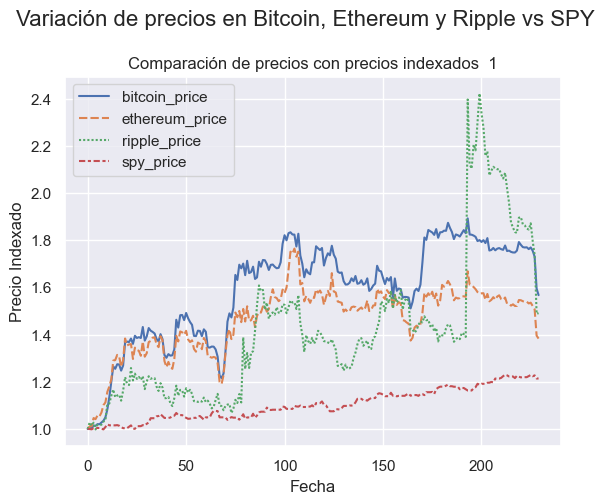

<Figure size 640x480 with 0 Axes>

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Divide los precios por el primer valor para indexarlos
combined_prices_spy_df['bitcoin_price'] = combined_prices_spy_df['bitcoin_price'] / combined_prices_spy_df['bitcoin_price'].iloc[0]
combined_prices_spy_df['spy_price'] = combined_prices_spy_df['spy_price'] / combined_prices_spy_df['spy_price'].iloc[0]
combined_prices_spy_df['ethereum_price'] = combined_prices_spy_df['ethereum_price'] / combined_prices_spy_df['ethereum_price'].iloc[0]
combined_prices_spy_df['ripple_price'] = combined_prices_spy_df['ripple_price'] / combined_prices_spy_df['ripple_price'].iloc[0]

# Utiliza Seaborn para crear el gráfico de líneas comparando los precios indexados
sns.set(style='darkgrid')
sns.lineplot(data=combined_prices_spy_df[['bitcoin_price', 'ethereum_price', 'ripple_price', 'spy_price']])
plt.xlabel('Fecha') 
plt.ylabel('Precio Indexado')
plt.suptitle('Variación de precios en Bitcoin, Ethereum y Ripple vs SPY',  y=1.02, fontsize=16)
plt.title('Comparación de precios con precios indexados a 1')

plt.show()
plt.savefig('Correlación_Top_10_criptomonedas.png')


In [255]:
null_count = combined_prices_spy_df['spy_price'].isnull().sum()
print(f"Número de valores nulos en spy_price: {null_count}")


Número de valores nulos en spy_price: 0


In [ ]:
combined_prices_spy_df['spy_price'].fillna(method='bfill', inplace=True)


In [ ]:
null_count = combined_prices_spy_df['spy_price'].isnull().sum()
print(f"Número de valores nulos en spy_price: {null_count}")


Número de valores nulos en spy_price: 0


In [256]:

# Obtener la primera y última fecha en el dataframe
first_date = combined_prices_spy_df['date'].iloc[0]
last_date = combined_prices_spy_df['date'].iloc[-1]

# Filtrar el dataframe por la primera y última fecha
first_price_df = combined_prices_spy_df[combined_prices_df['date'] == first_date]
last_price_df = combined_prices_spy_df[combined_prices_df['date'] == last_date]

# Calcular la variación del precio para cada criptomoneda
price_columns = ['bitcoin_price', 'ethereum_price', 'cardano_price', 'binancecoin_price',
'ripple_price', 'polkadot_price', 'dogecoin_price', 'avalanche-2_price', 'spy_price']

for crypto in price_columns:
    first_price = first_price_df[crypto].values[0]
    last_price = last_price_df[crypto].values[0]

    
    relative_change = ((last_price - first_price) / first_price) * 100
    print(f"Variación de {crypto} durante lo que va del año 2023:", round(relative_change,2), "%")


Variación de bitcoin_price durante lo que va del año 2023: 56.73 %
Variación de ethereum_price durante lo que va del año 2023: 38.31 %
Variación de cardano_price durante lo que va del año 2023: 5.5 %
Variación de binancecoin_price durante lo que va del año 2023: -11.51 %
Variación de ripple_price durante lo que va del año 2023: 49.1 %
Variación de polkadot_price durante lo que va del año 2023: 3.2 %
Variación de dogecoin_price durante lo que va del año 2023: -10.07 %
Variación de avalanche-2_price durante lo que va del año 2023: -0.57 %
Variación de spy_price durante lo que va del año 2023: 21.4 %


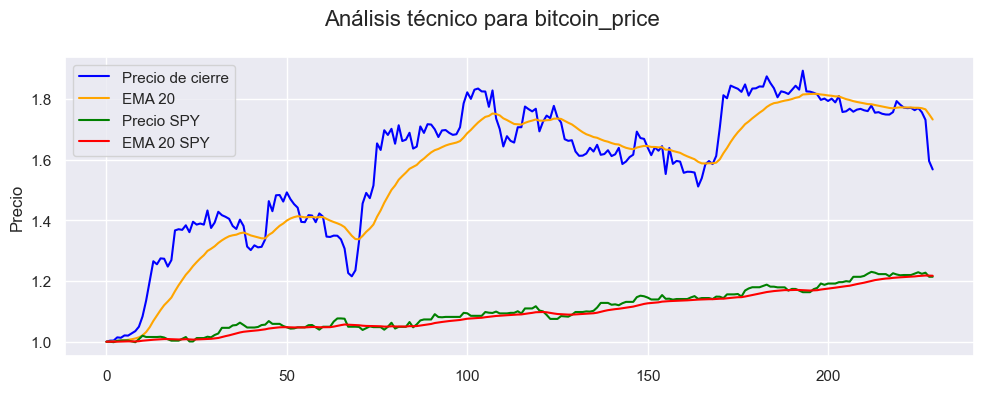

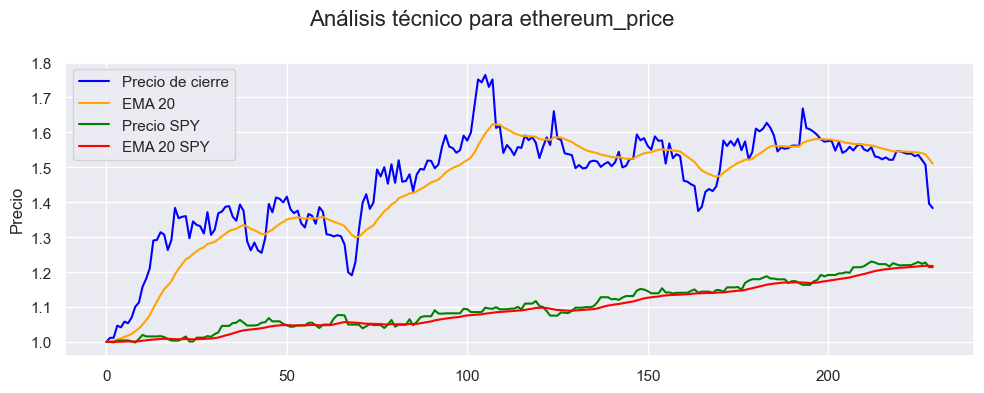

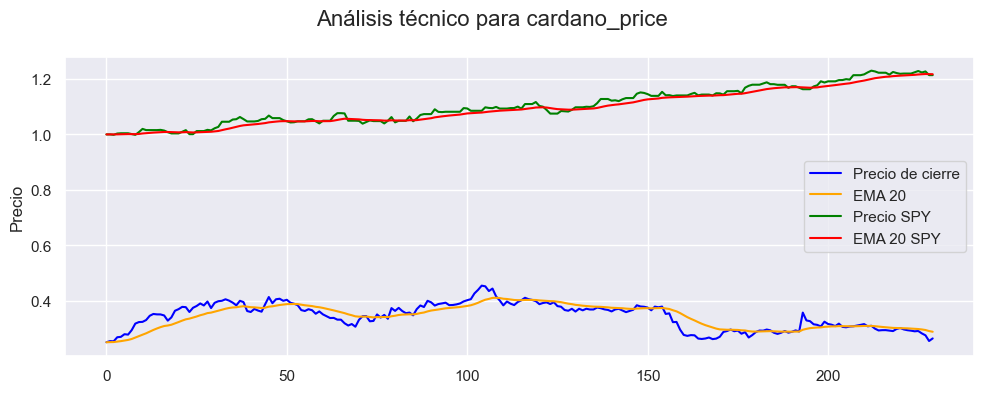

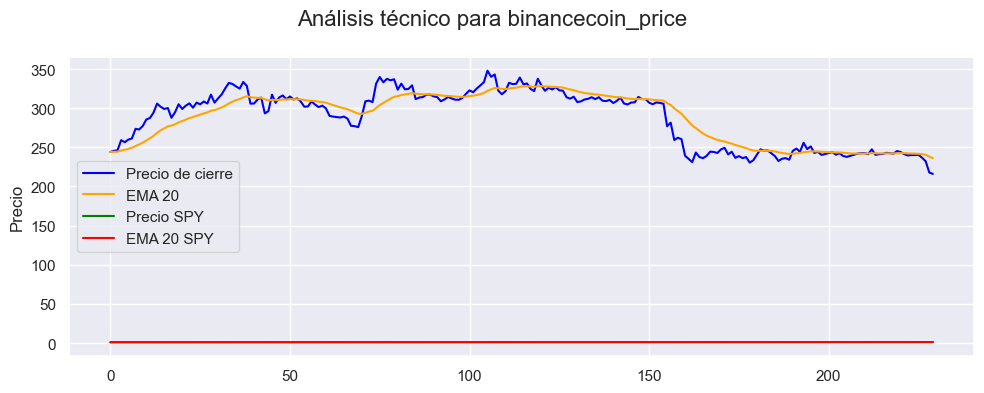

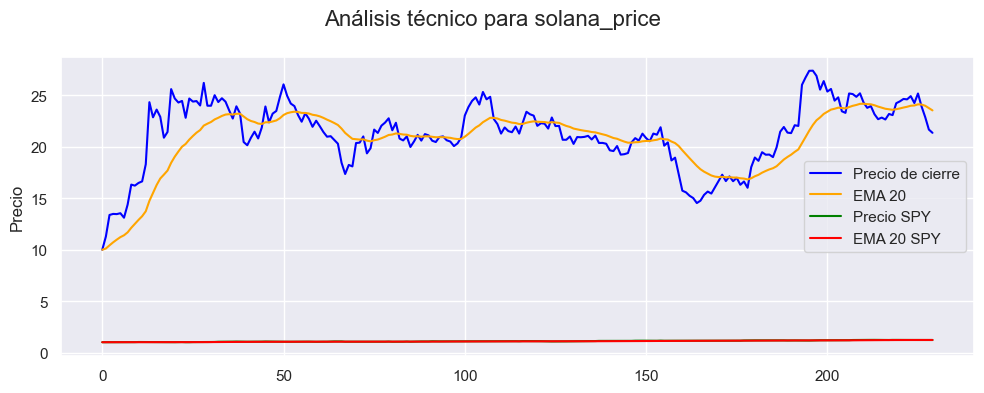

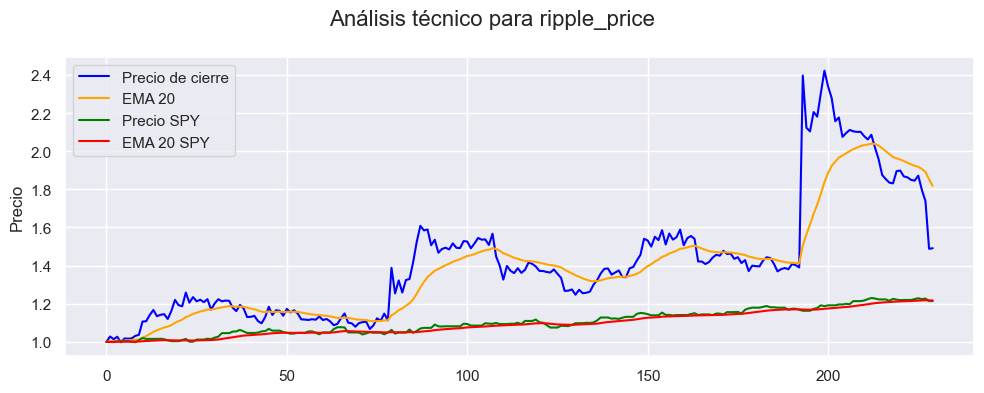

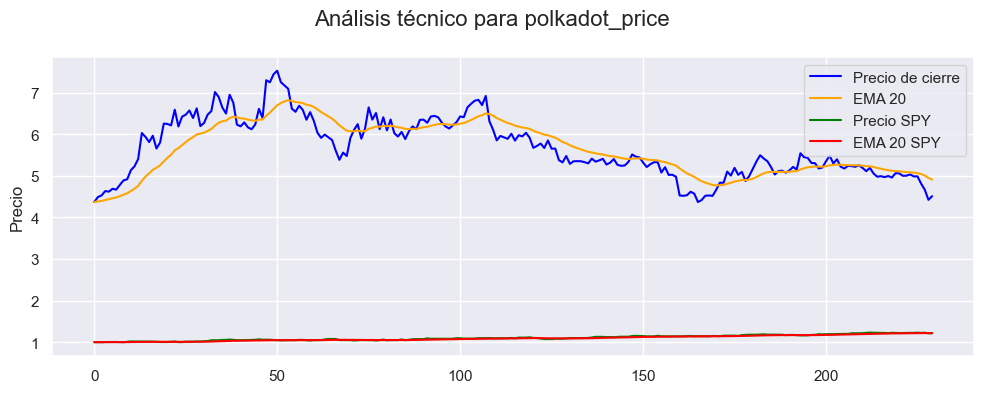

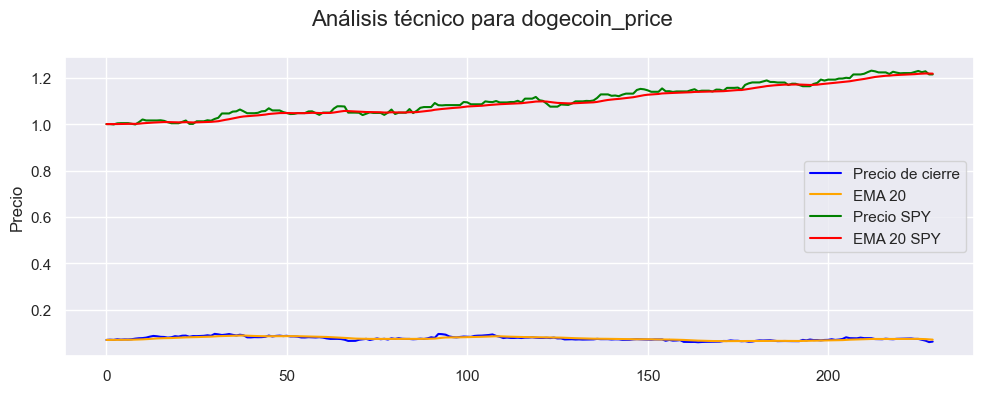

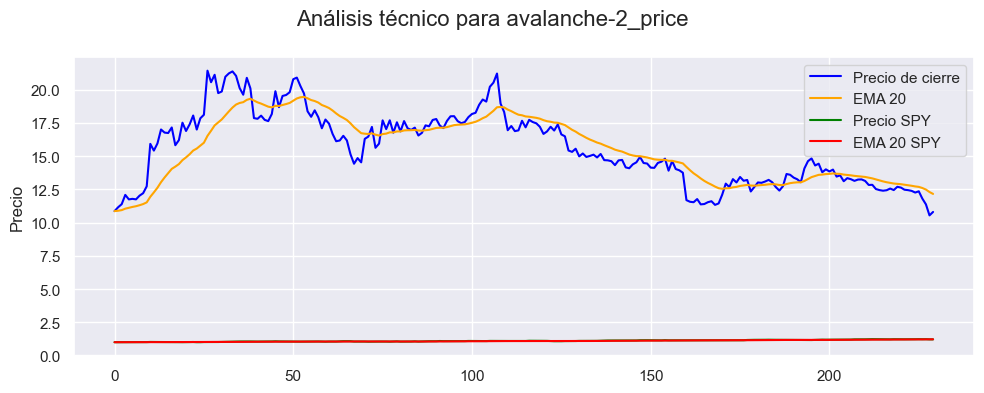

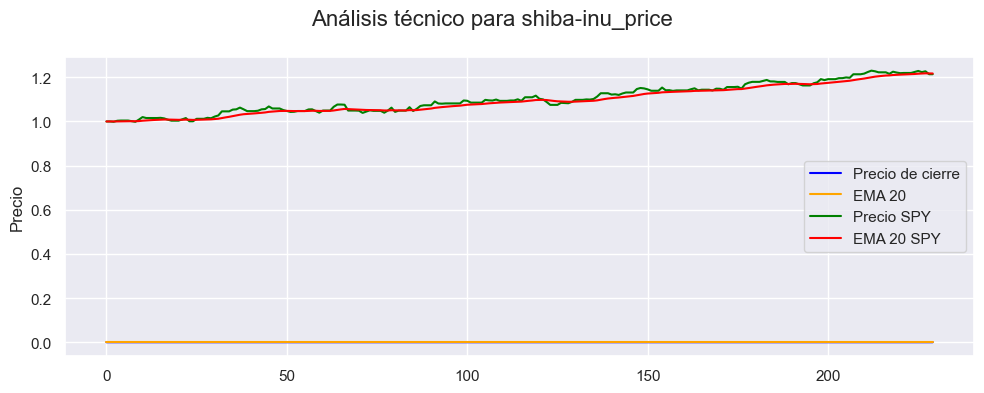

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import ta

# Supongamos que combined_prices_df es tu DataFrame con los datos
# y crypto_columns es la lista de columnas de precios de criptomonedas
# Calcular las Medias Móviles Exponenciales (EMA)
for column in crypto_columns:
    combined_prices_spy_df[f'{column}_EMA20'] = combined_prices_spy_df[column].ewm(span=20, adjust=False).mean()

# Calcular las Medias Móviles Exponenciales (EMA) para SPY
combined_prices_spy_df['spy_EMA20'] = combined_prices_spy_df['spy_price'].ewm(span=20, adjust=False).mean()

# Graficar los datos para criptomonedas y SPY
for column in crypto_columns:
    fig, axes = plt.subplots(nrows=1, figsize=(10, 4))
    fig.suptitle(f'Análisis técnico para {column}', fontsize=16)

    axes.plot(combined_prices_spy_df[column], label='Precio de cierre', color='blue')
    axes.plot(combined_prices_spy_df[f'{column}_EMA20'], label='EMA 20', color='orange')
    axes.plot(combined_prices_spy_df['spy_price'], label='Precio SPY', color='green')  # Agregar SPY
    axes.plot(combined_prices_spy_df['spy_EMA20'], label='EMA 20 SPY', color='red')  # Agregar EMA SPY
    axes.set_ylabel('Precio')
    axes.legend()

    plt.tight_layout()
    plt.show()


C:\Users\maral\AppData\Local\Temp\ipykernel_17760\419487398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_prices_df[f'{column}_EMA20'] = combined_prices_df[column].ewm(span=20, adjust=False).mean()
C:\Users\maral\AppData\Local\Temp\ipykernel_17760\419487398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_prices_df[f'{column}_EMA20'] = combined_prices_df[column].ewm(span=20, adjust=False).mean()
C:\Users\maral\AppData\Local\Temp\ipykernel_17760\419487398.py:9: SettingWithCopyWarni

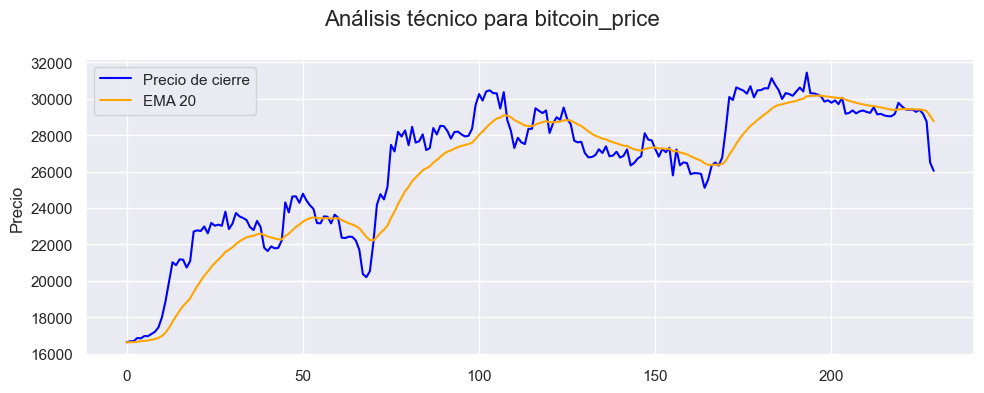

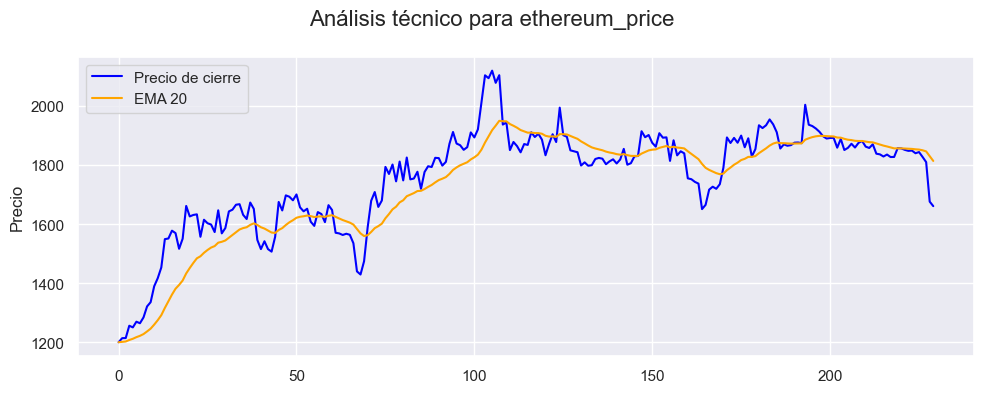

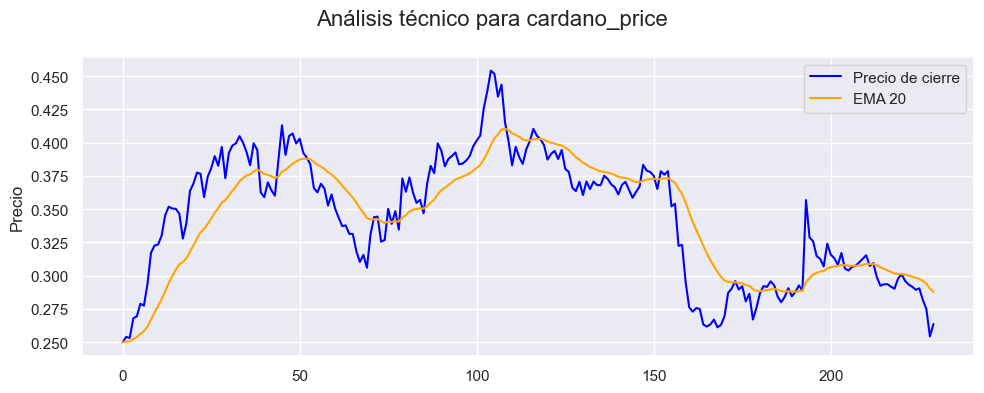

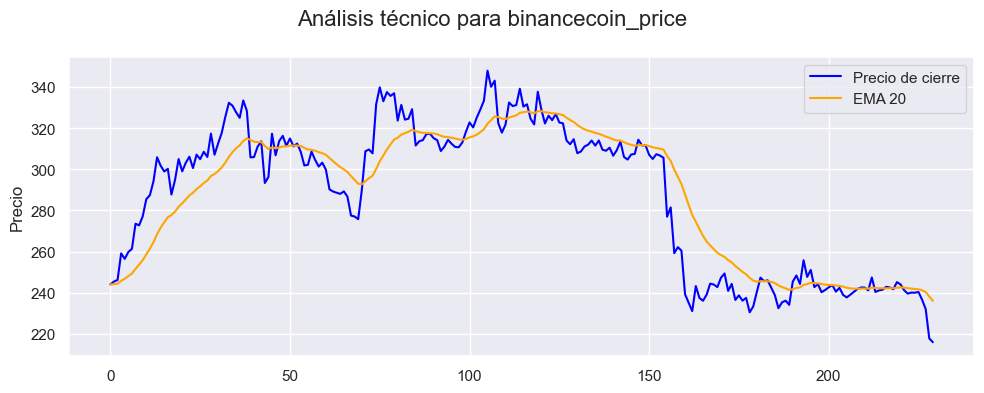

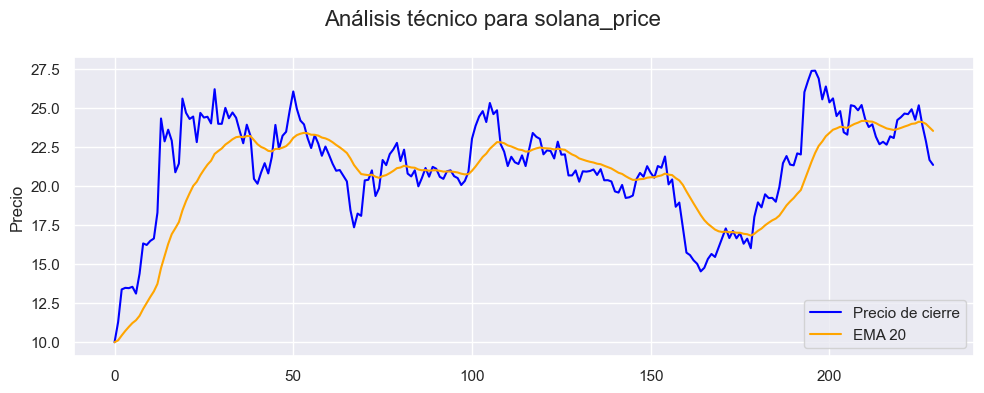

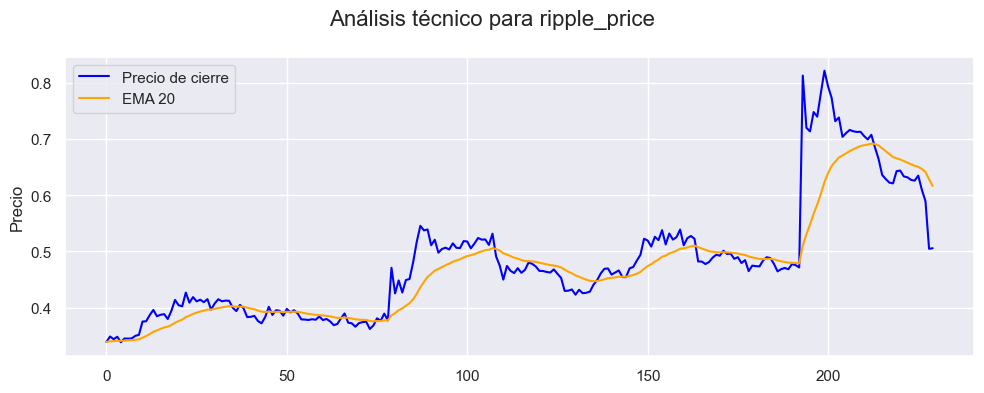

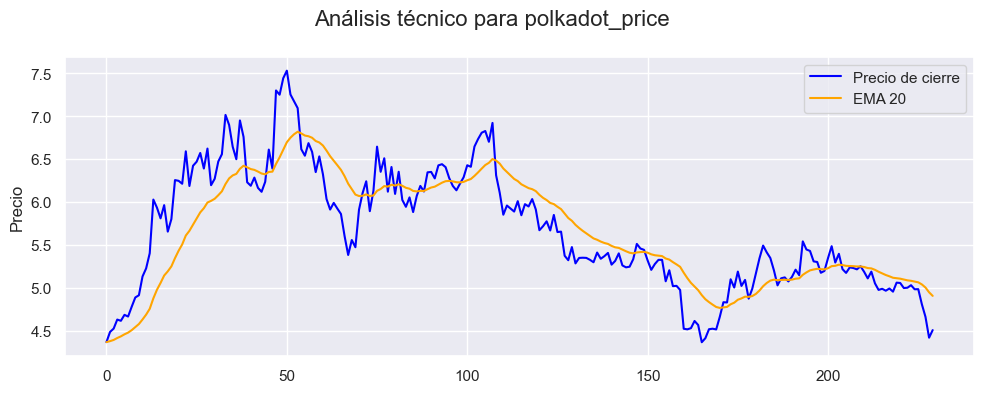

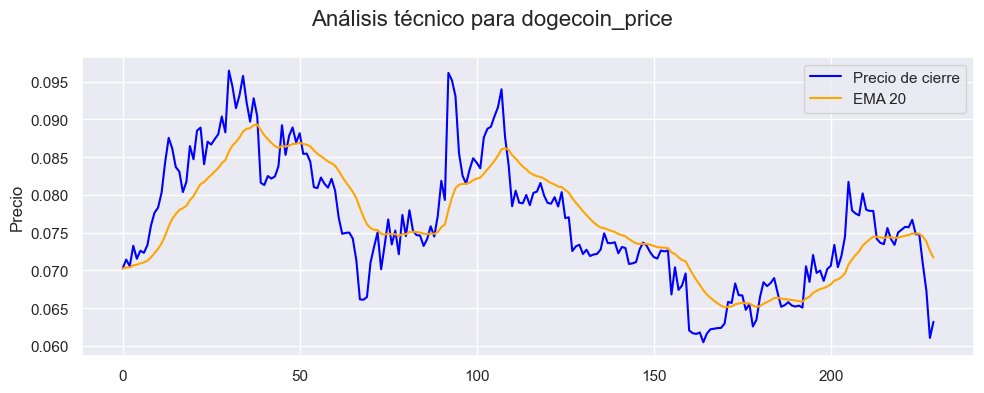

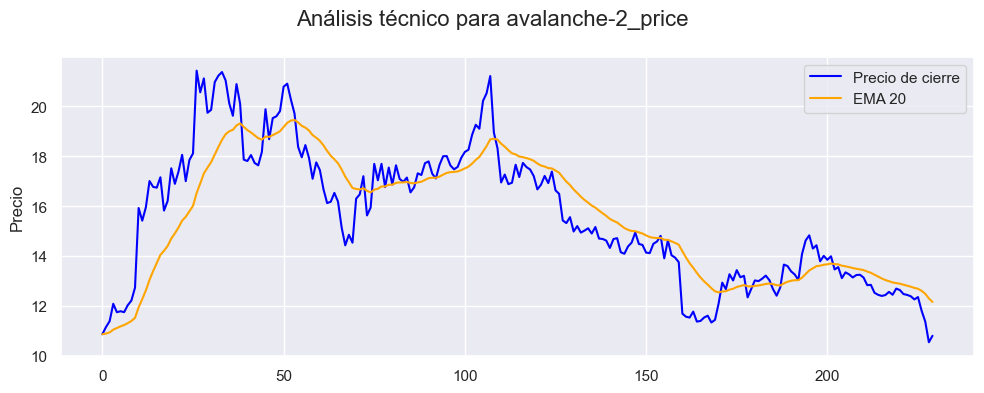

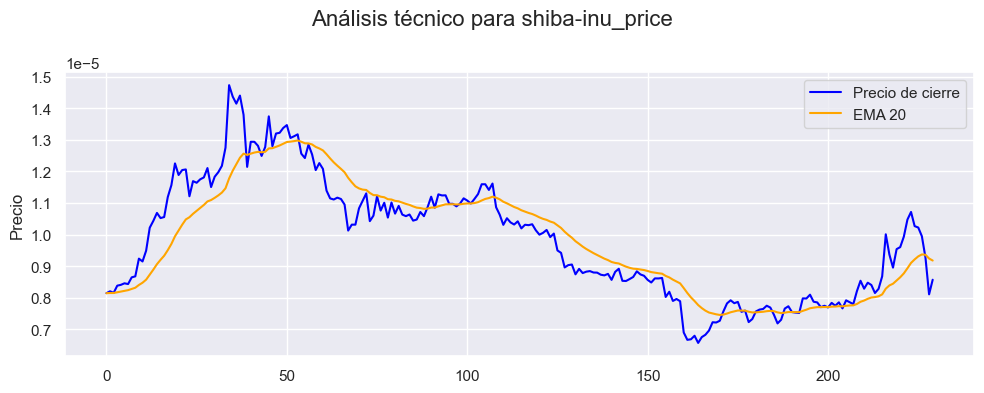

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import ta

# Supongamos que combined_prices_df es tu DataFrame con los datos
# y crypto_columns es la lista de columnas de precios de criptomonedas
# Calcular las Medias Móviles Exponenciales (EMA)
for column in crypto_columns:
    combined_prices_df[f'{column}_EMA20'] = combined_prices_df[column].ewm(span=20, adjust=False).mean()

# Graficar los datos
for column in crypto_columns:
    fig, axes = plt.subplots(nrows=1, figsize=(10, 4))
    fig.suptitle(f'Análisis técnico para {column}', fontsize=16)

    axes.plot(combined_prices_df[column], label='Precio de cierre', color='blue')
    axes.plot(combined_prices_df[f'{column}_EMA20'], label='EMA 20', color='orange')
    axes.set_ylabel('Precio')
    axes.legend()

    plt.tight_layout()
    plt.show()


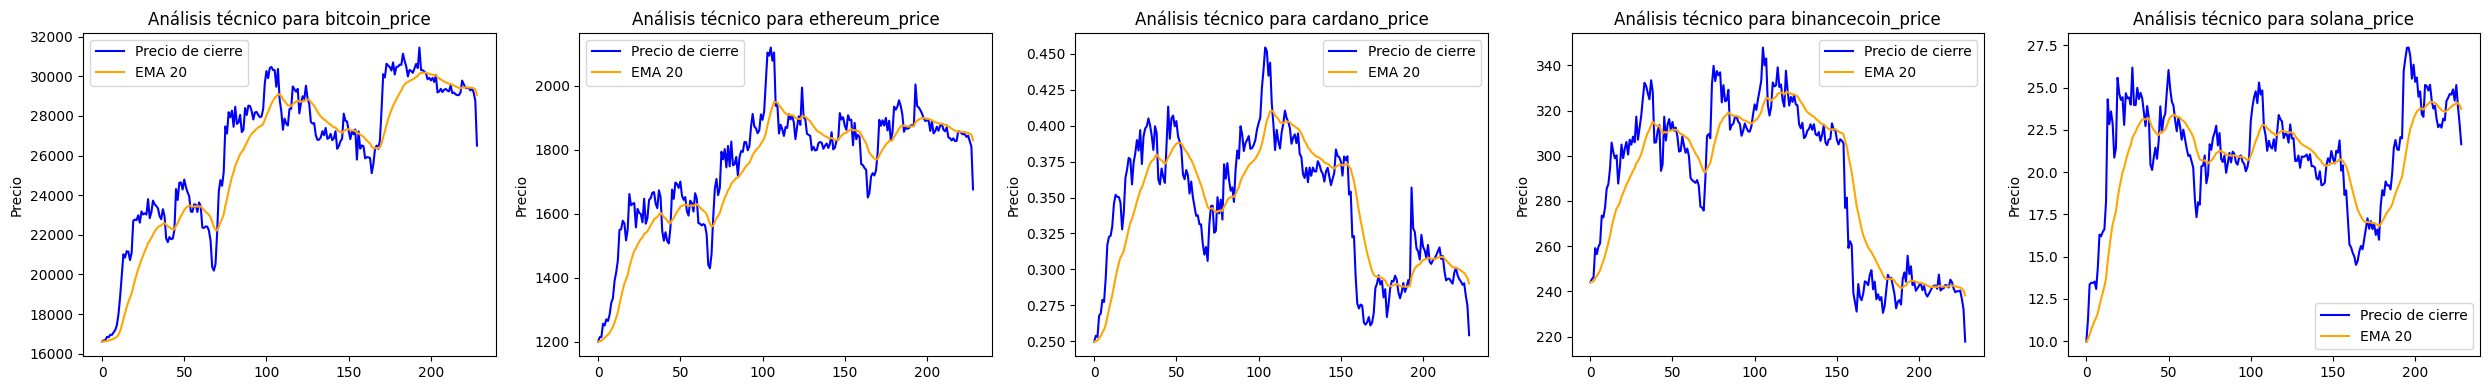

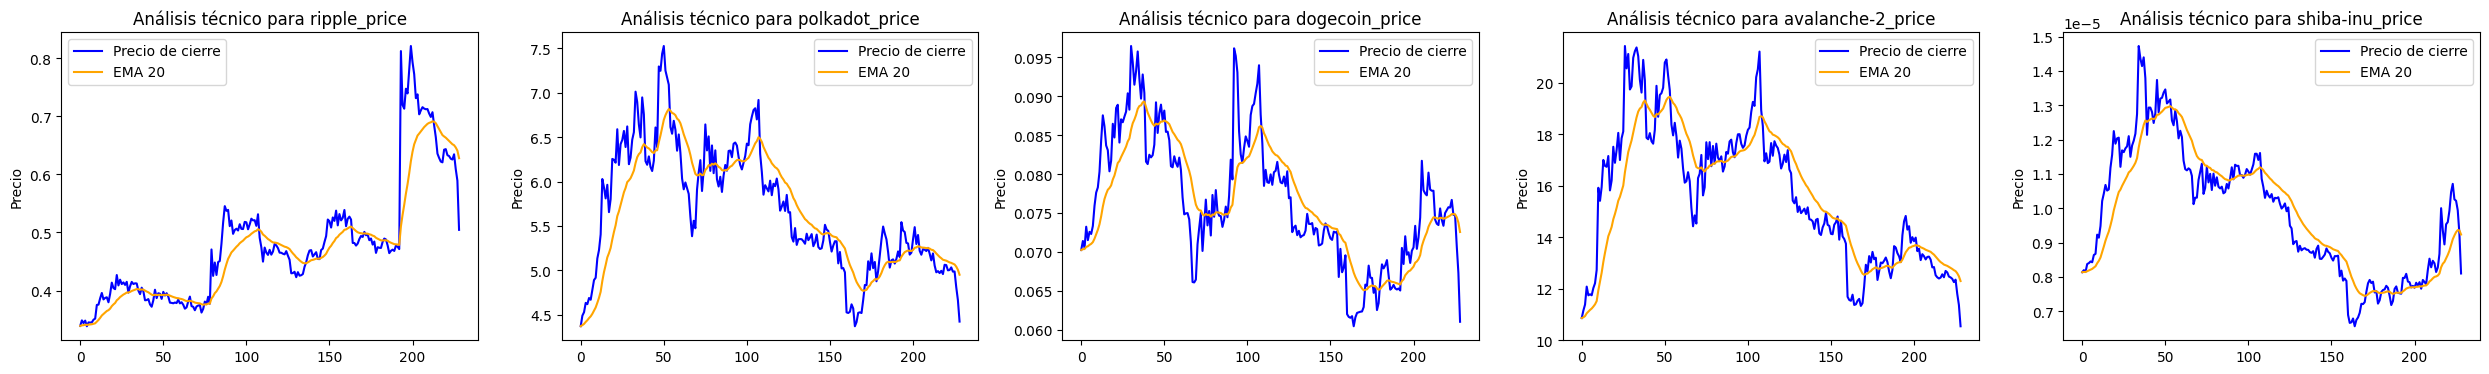

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ta

# Supongamos que combined_prices_df es tu DataFrame con los datos
# y crypto_columns es la lista de columnas de precios de criptomonedas

# Calcular las Medias Móviles Exponenciales (EMA)
for column in crypto_columns:
    combined_prices_df[f'{column}_EMA20'] = combined_prices_df[column].ewm(span=20, adjust=False).mean()

# Dividir las criptomonedas en grupos de 5
crypto_groups = [crypto_columns[i:i+5] for i in range(0, len(crypto_columns), 5)]

# Graficar los datos (5 gráficos por fila)
for group in crypto_groups:
    fig, axes = plt.subplots(nrows=1, ncols=len(group), figsize=(5*len(group), 4))
    
    for i, column in enumerate(group):
        axes[i].plot(combined_prices_df[column], label='Precio de cierre', color='blue')
        axes[i].plot(combined_prices_df[f'{column}_EMA20'], label='EMA 20', color='orange')
        axes[i].set_ylabel('Precio')
        axes[i].set_title(f'Análisis técnico para {column}')
        axes[i].legend()

    plt.tight_layout()
    plt.show()


este codigo es para las 10 criptomonedas dr
que significa qeu el ema 20 quede arriba o debajo del precio de cierre?
ChatGPT
La posición relativa del EMA 20 con respecto al precio de cierre en un gráfico puede proporcionar información sobre la dirección y fuerza de la tendencia de un activo financiero, como una criptomoneda. Aquí hay algunas pautas generales:

EMA 20 Por Encima del Precio de Cierre: Si el EMA 20 está por encima del precio de cierre, puede indicar una tendencia alcista o positiva. Esto sugiere que la tendencia general de los precios es ascendente y el activo podría estar ganando fuerza. Los inversores a menudo lo consideran un signo positivo y pueden interpretarlo como una señal de compra.

EMA 20 Por Debajo del Precio de Cierre: Si el EMA 20 está por debajo del precio de cierre, puede indicar una tendencia bajista o negativa. Esto sugiere que la tendencia general de los precios es descendente y el activo podría estar perdiendo fuerza. Los inversores a menudo lo consideran un signo negativo y pueden interpretarlo como una señal de venta.

Cruce de EMA y Precio de Cierre: Uno de los patrones técnicos comunes es el cruce entre el EMA y el precio de cierre. Un "cruce alcista" ocurre cuando el EMA cruza por encima del precio de cierre, lo que puede indicar un cambio potencial hacia una tendencia alcista. Un "cruce bajista" ocurre cuando el EMA cruza por debajo del precio de cierre, sugiriendo un cambio potencial hacia una tendencia bajista.

Es importante tener en cuenta que estas interpretaciones son indicativas y deben considerarse en el contexto de otros indicadores y análisis técnico más amplio. Además, los mercados financieros pueden ser volátiles y están sujetos a cambios rápidos, por lo que es esencial realizar análisis cuidadosos y considerar múltiples factores antes de tomar decisiones de inversión.

In [ ]:
pip install plotly


  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/26/5d/1e13b597ed8e54803e9ac6ded18c04cd35d8cbc49016778ec50c4ca9e9d5/plotly-5.16.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 217.9 kB/s eta 0:01:12
   ---------------------------------------- 0.0/15.6 MB 217.9 kB/s eta 0:01:12
   ---------------------------------------- 0.0/15.6 MB 196.9 kB/s eta 0:01:19
   ---------------------------------------- 0.1/15.6 MB 233.8 kB/s eta 0:01:07
   ---------------------------------------- 0.1/15.6 MB 233.8 kB

In [ ]:
df_categorias.tail()

id              name  market_cap  market_cap_change_24h  \
110       aave-tokens       Aave Tokens         0.0                    0.0   
111   linea-ecosystem   Linea Ecosystem         NaN                    NaN   
112    base-ecosystem    Base Ecosystem         NaN                    NaN   
113  mantle-ecosystem  Mantle Ecosystem         NaN                    NaN   
114   tenet-ecosystem   Tenet Ecosystem         NaN                    NaN   

    content                                        top_3_coins    volume_24h  \
110    None  [https://assets.coingecko.com/coins/images/116...  3.732743e+10   
111          [https://assets.coingecko.com/coins/images/297...           NaN   
112          [https://assets.coingecko.com/coins/images/995...           NaN   
113          [https://assets.coingecko.com/coins/images/325...           NaN   
114          [https://assets.coingecko.com/coins/images/301...           NaN   

                   updated_at  
110  2023-08-18T13:13:45.519Z  
111                      None  
112  2023-07-31T06:41:01.295Z  
113                      None  
114                      None

In [ ]:

df_categorias.isnull().sum()

id                        0
name                      0
market_cap               39
market_cap_change_24h    39
content                  17
top_3_coins               0
volume_24h               39
updated_at                3
dtype: int64

In [ ]:

# Almacenar el resultado del conteo en una variable
conteo_valores = df_categorias["id"].count()
print("Cantidad de valores no nulos en la columna 'id':", conteo_valores)

Cantidad de valores no nulos en la columna 'id': 115


In [ ]:
#parecen interesantes columnas name(cambiar nombre), market cap de la categoria,  content, updated at.

In [ ]:
df_categorias["top_3_coins"]

0      [https://assets.coingecko.com/coins/images/1/s...
1      [https://assets.coingecko.com/coins/images/279...
2      [https://assets.coingecko.com/coins/images/325...
3      [https://assets.coingecko.com/coins/images/825...
4      [https://assets.coingecko.com/coins/images/825...
                             ...                        
110    [https://assets.coingecko.com/coins/images/116...
111    [https://assets.coingecko.com/coins/images/297...
112    [https://assets.coingecko.com/coins/images/995...
113    [https://assets.coingecko.com/coins/images/325...
114    [https://assets.coingecko.com/coins/images/301...
Name: top_3_coins, Length: 115, dtype: object

In [ ]:
df_categorias["content"]

0                                                       
1      Smart contract platforms are usually blockchai...
2                                                       
3      Tokens and cryptocurrencies alleged to be secu...
4      These tokens are normally associated with both...
                             ...                        
110                                                 None
111                                                     
112                                                     
113                                                     
114                                                     
Name: content, Length: 115, dtype: object

In [ ]:
#ver en la api como surge la aegoria de cada moneda

In [ ]:
#ver mas datos en la api para explorar 

In [ ]:


url = "https://api.coingecko.com/api/v3/global"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    
    # Crear un DataFrame a partir de los datos
    df_global = pd.DataFrame([data["data"]])
    
    # Imprime los datos globales
    print("Datos Globales:")
    print("Total de criptomonedas:", data["data"]["active_cryptocurrencies"])
    print("Total de mercados:", data["data"]["markets"])
    print("BTC Dominancia:", data["data"]["market_cap_percentage"]["btc"], "%")
    print("Volumen total 24h:", data["data"]["total_volume"]["usd"], "USD")
    print("Capitalización total:", data["data"]["total_market_cap"]["usd"], "USD")
else:
    print("Error al obtener los datos. Código de estado:", response.status_code)


Datos Globales:
Total de criptomonedas: 10107
Total de mercados: 821
BTC Dominancia: 46.50856415585726 %
Volumen total 24h: 120536667221.78412 USD
Capitalización total: 1101316072409.0127 USD


In [ ]:
df_global.head()

active_cryptocurrencies  upcoming_icos  ongoing_icos  ended_icos  markets  \
0                    10107              0            49        3376      821   

                                    total_market_cap  \
0  {'btc': 41843878.33342539, 'eth': 655915808.72...   

                                        total_volume  \
0  {'btc': 4579722.174500105, 'eth': 71788569.641...   

                               market_cap_percentage  \
0  {'btc': 46.50856415585726, 'eth': 18.297655339...   

   market_cap_change_percentage_24h_usd  updated_at  
0                             -6.313858  1692364618

In [ ]:
#traer api dolar blue, precios, o de cripto ya, para ver distintos dolares y exhchanges locales

In [ ]:
url = "https://api.coingecko.com/api/v3/exchanges"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    
    # Crear un DataFrame a partir de los datos
    df_exchanges = pd.DataFrame(data)
    print(df_exchanges)
else:
    print("Error en la solicitud a la API")


                      id                  name  year_established  \
0                binance               Binance            2017.0   
1                   gdax     Coinbase Exchange            2012.0   
2             bybit_spot                 Bybit            2018.0   
3                  huobi                 Huobi            2013.0   
4                 kraken                Kraken            2011.0   
..                   ...                   ...               ...   
95             sushiswap             Sushiswap            2020.0   
96                pulsex                PulseX               NaN   
97  velodrome-finance-v2  Velodrome Finance v2               NaN   
98                biswap                Biswap               NaN   
99         dodo_arbitrum       DODO (Arbitrum)               NaN   

                   country                                        description  \
0           Cayman Islands                                                      
1            United S

In [ ]:
df_exchanges.head(10)

id               name  year_established                 country  \
0     binance            Binance            2017.0          Cayman Islands   
1        gdax  Coinbase Exchange            2012.0           United States   
2  bybit_spot              Bybit            2018.0  British Virgin Islands   
3       huobi              Huobi            2013.0              Seychelles   
4      kraken             Kraken            2011.0           United States   
5      kucoin             KuCoin            2014.0              Seychelles   
6  binance_us         Binance US            2019.0           United States   
7        okex                OKX            2017.0              Seychelles   
8        gate            Gate.io               NaN          Cayman Islands   
9      bitget             Bitget            2018.0              Seychelles   

                                         description  \
0                                                      
1                                                      
2  Bybit is a cryptocurrency exchange that offers...   
3                                                      
4                                                      
5                                                      
6                                                      
7                                                      
8  Gate was established in 2013, and it is the to...   
9                                                      

                                           url  \
0                     https://www.binance.com/   
1   https://coinbase-consumer.sjv.io/coingecko   
2                        https://www.bybit.com   
3                        https://www.huobi.com   
4  https://r.kraken.com/c/2223866/687155/10583   
5                      https://www.kucoin.com/   
6                      https://www.binance.us/   
7                          https://www.okx.com   
8                             https://gate.io/   
9     https://www.bitget.com/referral/register   

                                               image has_trading_incentive  \
0  https://assets.coingecko.com/markets/images/52...                 False   
1  https://assets.coingecko.com/markets/images/23...                 False   
2  https://assets.coingecko.com/markets/images/69...                 False   
3  https://assets.coingecko.com/markets/images/25...                 False   
4  https://assets.coingecko.com/markets/images/29...                 False   
5  https://assets.coingecko.com/markets/images/61...                 False   
6  https://assets.coingecko.com/markets/images/46...                 False   
7  https://assets.coingecko.com/markets/images/96...                 False   
8  https://assets.coingecko.com/markets/images/60...                 False   
9  https://assets.coingecko.com/markets/images/54...                 False   

   trust_score  trust_score_rank  trade_volume_24h_btc  \
0           10                 1         575352.443815   
1           10                 2          87402.477325   
2           10                 3          82633.897515   
3           10                 4          42514.432981   
4           10                 5          41646.917904   
5           10                 6          31708.229746   
6           10                 7            941.128779   
7            9                 8         115903.834007   
8            9                 9          68167.193572   
9            9                10          28368.036749   

   trade_volume_24h_btc_normalized  
0                    426265.081525  
1                     87402.477325  
2                     82633.897515  
3                     42514.432981  
4                     41646.917904  
5                     31708.229746  
6                       941.128779  
7                    114659.592286  
8                     68167.193572  
9                     28368.036749

In [ ]:

#Empresas que cotizan en bolsa que tienen criptomonedas entre sus activos

url = "https://api.coingecko.com/api/v3/companies/public_treasury/bitcoin"


response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    
    # Crear un DataFrame a partir de los datos
    df_bolsa = pd.DataFrame(data)
    print(df_exchanges)
else:
    print("Error en la solicitud a la API")


                      id                  name  year_established  \
0                binance               Binance            2017.0   
1                   gdax     Coinbase Exchange            2012.0   
2             bybit_spot                 Bybit            2018.0   
3                  huobi                 Huobi            2013.0   
4                 kraken                Kraken            2011.0   
..                   ...                   ...               ...   
95             sushiswap             Sushiswap            2020.0   
96                pulsex                PulseX               NaN   
97  velodrome-finance-v2  Velodrome Finance v2               NaN   
98                biswap                Biswap               NaN   
99         dodo_arbitrum       DODO (Arbitrum)               NaN   

                   country                                        description  \
0           Cayman Islands                                                      
1            United S

In [ ]:
df_bolsa.head() # ver como traer los datos de companies,,, ver arriba algun ej similar

total_holdings  total_value_usd  market_cap_dominance  \
0     232549.7158     6.116402e+09                   1.2   
1     232549.7158     6.116402e+09                   1.2   
2     232549.7158     6.116402e+09                   1.2   
3     232549.7158     6.116402e+09                   1.2   
4     232549.7158     6.116402e+09                   1.2   

                                           companies  
0  {'name': 'MicroStrategy Inc.', 'symbol': 'NASD...  
1  {'name': 'Marathon Digital Holdings', 'symbol'...  
2  {'name': 'Galaxy Digital Holdings', 'symbol': ...  
3  {'name': 'Coinbase Global, Inc', 'symbol': 'NA...  
4  {'name': 'Tesla, Inc.', 'symbol': 'NASDAQ:TSLA...